<p><b>COMP 499 - Project </b> </p>
<p><b>Name: Kisife Giles</b> </p>
<p><b>ID: 40001926 </b> </p>

<p><b>Purpose/Questions:</b> In developing countries, communicable diseases are emphasized much more than non-communicable diseases. As economies and lives improve, non-communicable diseases could become more and more prevalent.</p>
<p>This project attempts to use data from World Health Organisation (WHO) to look for correlation between economic growth and non-communicable disease health indicators in developing countries. 
The data analyzed is collected for 189 countries, from 1960 to 2004/2008. Correlation between economic growth and health indicators is examined for the following countries: Nigeria, Philippines, Chile, Zambia, Trinidad and Tobago and Colombia.</p>
<p> The following health indicators are considered:</p>
<p> Body Mass Index, cholesterol levels, blood pressure (systolic)</p>
<p>Mortality per 1000 people due to breast cancer, colorectal cancer, stomach cancer, liver cancer, lung cancer </p>
<p> Variables for each indicator is plotted against economic growth, a regression model and Pearson correlation coefficients calculated. Linear regression is used for simplicity. Some relations are not linear.</p>
<p> As a result/conclusion, no clear correlation appears to exist for all countries, perhaps due to the complex nature of the disseases under consideration. Perhaps, there could be correlations within cluster countries within a region.
 
    
</p>
<p>Data source:https://www.gapminder.org/data/</p>
<p>https://equityhealthj.biomedcentral.com/articles/10.1186/1475-9276-4-2</p>

<p><b>Countries Choosen:</b></p>
<p>Botswana, Ghana, Nigeria, Kenya, Philippines, Chile, Zambia, Trinidad and Tobago and Colombia, India and China.</p>


Rationel:
Project on worl health.
Data source:https://www.gapminder.org/data/


In [1]:
#imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#MODELING....
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sbn


<b>Data Acquisition/Loading and Characterization</b>

In [2]:
            #World economic growth 1960-2004
econ_df=pd.read_excel("data/gdp_pc_past_10yr_growth.xlsx")

            #Communicable disease data: Reported Deaths per 100000
malaria_df=pd.read_excel("data/malaria deaths_per_100000.xlsx")
tb_and_hiv = pd.read_excel("data/tb_with_hiv_deaths_per_100000.xlsx")

            #Non-communicable disease data
# Blood pressure data
bp_females =pd.read_excel("data/SBP_females.xlsx")
bp_males =pd.read_excel("data/SBP_males.xlsx")

#Cholesterol levels in males and females
cholesterol_f_df=pd.read_excel("data/TC_female_ASM.xlsx")
cholesterol_m_df=pd.read_excel("data/TC_male_ASM.xlsx")

#Obesity levels: BMI index(kg/m2)
bmi_f_df=pd.read_excel("data/BMI_female_ASM.xlsx")
bmi_m_df=pd.read_excel("data/BMI_male_ASM.xlsx")

            #Cancer data
#Breast cancer mortality
brtm = pd.read_excel("data/breast_cancer_mortality.xlsx")
#Cervix cancer
cvc=pd.read_excel("data/cervical_cancer_mortality.xlsx")

#Colorectal cancer
colrec_m = pd.read_excel("data/colo_rectal_male.xlsx")
colrec_f = pd.read_excel("data/colo_rectal_female.xlsx")

#Liver cancer
liverc_m = pd.read_excel("data/liver_cancer_mortality_male.xlsx")
liverc_f = pd.read_excel("data/liver_cancer_mortality_female.xlsx")

#Stomach cancer data
stomach_f = pd.read_excel("data/stomach_cancer_mortality_female.xlsx")
stomach_m = pd.read_excel("data/stomach_cancer_mortality_male.xlsx")

#Lung cancer data
lung_f = pd.read_excel("data/lung_cancer_mortality_female.xlsx")
lung_m = pd.read_excel("data/lung_cancer_mortality_male.xlsx")

#Prostate cancer
prst =pd.read_excel("data/prostate_cancer_mortality.xlsx")

            #Other factors, to consider if time allows!
    #Democracy indicator
democracy_df=pd.read_excel("data/indicatorpolityiv.xlsx")

    
#Life expectancy at birth
life_expectancy_birth=pd.read_excel("data/life_expectancy_at_birth.xlsx")

#Number of physicians per 1000 patients
physicians_per_1000 = pd.read_excel("data/physicians_per_1000_people.xlsx")


<p>Characterization of variables. Since the datasets are very similar in structure, it is sufficient to characterize the variables in just one. To do this, I use a subset of the economic growth dataset.</p>
<p> The datasets valiables are <b>categorical(Nation column)</b> and <b> numeric( Year columns)</b> as can be seen below.</p>

In [3]:
df_subset=econ_df.iloc[0:10,0:5]
df_subset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
Nation    10 non-null object
1960      3 non-null float64
1961      3 non-null float64
1962      3 non-null float64
1963      3 non-null float64
dtypes: float64(4), object(1)
memory usage: 480.0+ bytes


<p> <b> Data Wrangling and integration</b> </p>
<p> The datasets have the structure shown below, with the country and years as columns. Each health index data  is presented in a separate dataset</p>
<p> <b>Data selection and preparation/reshaping </b> Transforming data rows into colums. The countries chosen for each category are those with rich (at most 5 out of 54 missing values) datasets. In some cases, missing data is replaced by data for the year 2002, a reference year </p>
<p> <b> User-defined functions for data wrangling are presented below. </b></p>

In [8]:
#Data on economic growth
econ_df.head(3)

,Nation,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-9.681010,-9.735691,-7.832190,-6.703747,-7.435903,-12.172492,-13.755837,-9.628362,-6.379329,-5.494353
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.272994,6.706477,11.155583,8.317806,6.722061
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.245647,-0.407905,-0.834492,-0.116493,0.058708,0.324176,0.335679,0.187646,0.988286,NaN


<p> <b> User defined functions for data wrangling and visualization</b> </p>

In [9]:
#Function impute missing values in a dataset with the reference/normalized values for the year 2002
def fillMissingValues(df):
    value = df[(df['Year']==2002)]
    refValue = value.Value
    data = pd.DataFrame(refValue)
    refData = data.iloc[0,0]
    df.fillna(refData,inplace=True)
    return df

In [10]:
# This function takes as input, a 1 row dataframe and rotates it 90 degrees to convert row to columns,
# and adds a time series column with range start:end.

def mutateDF(df):
    if df is None:
        return
    col = df.columns
    start = col[1]
    end = col[len(col)-1]+1
    df_T = df.T
    df_T = df_T.drop([df_T.index[0]])
    df_T.columns=["Value"]
    df_T["Year"] = range(start,end,1)
    columnsTitles = ["Year","Value"]
    df_plot = df_T.reindex(columns = columnsTitles)
    return df_plot


In [11]:
# Function plots df.Year against df.Value for dataframe passed as argument.
def quickPlot1(df,aTitle):
    if df is None:
        return
    df = fillMissingValues(df)
    plt.subplots()
    plt.xlabel("Year")
    plt.ylabel("Index")
    plt.plot(df.Year,df.Value,'g')
    plt.legend((aTitle),loc='upper left', shadow=True)
    plt.title(aTitle)


In [15]:
#Function plots df.Year against df.Value for dataframes df1 and df2 passed as argument.
def quickPlot2(df1,df2,aTitle,xlabel,ylabel,legend1,legend2):
    if df1 is None or df2 is None:
        return
    df1 = fillMissingValues(df1)
    df2 = fillMissingValues(df2)
    size1 = df1.shape
    size2 = df2.shape
    #If dataframes have same length, plot without reshaping.
    if size1[0]==size2[0]:
        plt.subplots()
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.plot(df1.Year,df1.Value,'r',df2.Year,df2.Value,'b')
        plt.legend((legend1,legend2),loc=0, shadow=True)
        plt.title(aTitle)
    #Reshape dataframes before ploting.
    else:
        h1 = df1.head(1)
        h2 = df2.head(1)
        t1 = df1.tail(1)
        t2 = df2.tail(1)
        yr1 = h1.iloc[0,0]
        yr2 = h2.iloc[0,0]
        l1 = t1.iloc[0,0]
        l2 = t2.iloc[0,0]
        hmax = max(yr1,yr2)
        tmin = min(l1,l2)
        
        plt.subplots()
        plt.xlim(hmax,tmin)
        plt.title(aTitle)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.plot(df1.Year,df1.Value,'r',df2.Year,df2.Value,'b')
        plt.legend((legend1,legend2),loc=0, shadow=True)
        

In [16]:
#Function plots df.Year against df.Value for dataframes df1 df2 and df3 passed as argument.
def quickPlot3(df1,df2,df3,aTitle,xlabel,ylabel,legend1,legend2,legend3):
    #Return if dataframes are empty
    if df1 is None and df2 is None:
        return
    #Treat missing values
    df1 = fillMissingValues(df1)
    df2 = fillMissingValues(df2)
    df3 = fillMissingValues(df3)
    size1 = df1.shape
    size2 = df2.shape
    #If dataframes have same length, plot without reshaping.
    if size1[0]==size2[0]:
        plt.subplots()
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(aTitle)
        plt.plot(df1.Year,df1.Value,'r',df2.Year,df2.Value,'b',df3.Year,df3.Value,'g')
        plt.legend((legend1,legend2,legend3),loc=0, shadow=True)
        
    #Reshape dataframes before plotting
    else:
        h1 = df1.head(1)
        h2 = df2.head(1)
        t1 = df1.tail(1)
        t2 = df2.tail(1)
        yr1 = h1.iloc[0,0]
        yr2 = h2.iloc[0,0]
        l1 = t1.iloc[0,0]
        l2 = t2.iloc[0,0]
        #This sets the range for dataset plot to match
        hmax = max(yr1,yr2)
        tmin = min(l1,l2)
        
        plt.subplots()
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(aTitle)
        plt.xlim(hmax,tmin)
        plt.plot(df1.Year,df1.Value,'r',df2.Year,df2.Value,'b',df3.Year,df3.Value,'g')
        plt.legend((legend1,legend2,legend3),loc=0, shadow=True)
    
        

In [17]:
#Method imputes and adjusts the lengths of two dataframes prior to analyzing them.
def prepDFs(df1,df2):
    df1 = fillMissingValues(df1)
    df2 = fillMissingValues(df2)
    new_df = pd.merge(df1, df2, on='Year', how='inner')
    return new_df

In [18]:
#Linear regression model function. Function returns a tuple consisting of the predicted values,the equation,
# the dtaframe used for the regression and the slpope and intercept.

def lgfunction(df1,df2):
    new_df = prepDFs(df1,df2)
    model = LinearRegression().fit(new_df[['Value_x']],new_df[['Value_y']])
    m = model.coef_[0]
    b = model.intercept_
    #Equation of the line
    equation = "Y = "+ str(round(m[0],2))+ "X + "+ str(round(b[0],2))
    predictions = model.predict(new_df[['Value_x']])
    return (predictions,equation,new_df,m,b)

In [20]:
#Function does a scatter plot of the datasets passed as parameter. 
#It also plots a linear regression line and provides an equation.
def quickScatterPlot(df1,df2,aTitle,xlabel,ylabel):
    legend1=xlabel 
    legend2 =ylabel 
    if df1 is None or df2 is None:
        return
    else:
        predAndEquat = lgfunction(df1,df2)
        equation = str(predAndEquat[1])
        m = predAndEquat[3]
        c = predAndEquat[4]
        
        plt.subplots()
        plt.title(aTitle + " "+ equation)
        plt.legend((legend1),loc=0, shadow=True)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        new_df = predAndEquat[2]
        new_df['Calculated']= new_df.Value_x*m + c
        plt.scatter(new_df.Value_x, new_df.Value_y,c='r')
        plt.plot(new_df.Value_x, new_df.Calculated,c='b')
        plt.show()

Select and load GDP per capita data for the countries of interest.

In [25]:
#Select Economic growth datasets
econ_nigeria = econ_df[(econ_df['Nation']=='Nigeria')]
econ_philippines = econ_df[( econ_df['Nation']=='Philippines')]
econ_vietnam = econ_df[( econ_df['Nation']=='Vietnam')]

econ_ghana = econ_df[(econ_df['Nation']=='Ghana')]
econ_ghana_plot = mutateDF(econ_ghana)
econ_kenya = econ_df[(econ_df['Nation']=='Kenya')]
econ_kenya_plot = mutateDF(econ_kenya)
econ_china = econ_df[(econ_df['Nation']=='China')]
econ_china_plot = mutateDF(econ_china)
econ_india = econ_df[(econ_df['Nation']=='India')]
econ_india_plot = mutateDF(econ_india)

econ_canada = econ_df[(econ_df['Nation']=='Canada')]
econ_canada_plot = mutateDF(econ_canada)

econ_SA = econ_df[(econ_df['Nation']=='South Africa')]

econ_USA = econ_df[(econ_df['Nation']=='United States')]
econ_usa_plot = mutateDF(econ_USA)

econ_chile = econ_df[(econ_df['Nation']=='Chile')]


econ_chile_plot = mutateDF(econ_chile)

econ_trinidad = econ_df[(econ_df['Nation']=='Trinidad and Tobago')]
econ_trinidad_plot = mutateDF(econ_trinidad)

econ_colombia = econ_df[(econ_df['Nation']=='Colombia')]
econ_colombia_plot = mutateDF(econ_colombia)
econ_chile.head()
econ_zambia = econ_df[(econ_df['Nation']=='Zambia')]
econ_botswana = econ_df[(econ_df['Nation']=='Botswana')]
econ_zambia_plot = mutateDF(econ_zambia)
econ_nigeria.head()

,Nation,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
124,Nigeria,4.390345,3.148914,2.574648,3.120009,2.779442,1.759564,1.206135,-0.592637,-1.071925,...,-0.0737,0.992307,1.336106,0.613551,0.417907,0.12864,-0.083353,0.062699,1.252725,1.320333


Data wrangling to re-shape the dataframes by transforming rows into columns.

In [26]:
#Reshape the datasets
econ_nigeria_plot = mutateDF(econ_nigeria)
econ_botswana_plot = mutateDF(econ_botswana)
econ_zambia_plot = mutateDF(econ_zambia)
econ_philippines_plot = mutateDF(econ_philippines)
econ_vietnam_plot = mutateDF(econ_vietnam)
econ_nigeria_plot.head(2)

,Year,Value
1960,1960,4.39035
1961,1961,3.14891


Before analyzing the data on non-communicable diseases, I examine data on a two communicable diseases. Motality due to communicable diseases genenerally go down with economic growth.

<p> <b>Data on Communicatble diseases: Malaria, TB and HIV </b></p>

In [27]:
#Select datasets for malaria deaths per 1000 
malaria_nigeria = malaria_df[(malaria_df['Nation']=='Nigeria')]
malaria_botswana = malaria_df[(malaria_df['Nation']=='Botswana')]
malaria_philippines = malaria_df[(malaria_df['Nation']=='Philippines')]
malaria_vietnam = malaria_df[(malaria_df['Nation']=='Viet Nam')]
malaria_zambia = malaria_df[(malaria_df['Nation']=='Zambia')]
malaria_nigeria

,Nation,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
29,Nigeria,2.418101,2.002117,1.066902,0.6892,1.590743,2.997888,4.258586,3.995909,5.236272,3.392253,4.541862,3.371639,3.115668,3.967789,4.37098,4.594072,4.550858


In [28]:
#Reshape datasets. See original shape above.
malaria_nigeria_plot = mutateDF(malaria_nigeria)
malaria_philippines_plot = mutateDF(malaria_philippines)
malaria_zambia_plot = mutateDF(malaria_zambia)
malaria_vietnam_plot = mutateDF(malaria_vietnam)
malaria_botswana_plot = mutateDF(malaria_botswana)
malaria_nigeria_plot.head(3)

,Year,Value
1990,1990,2.4181
1991,1991,2.00212
1992,1992,1.0669


TB and HIV deaths in the Philippines and Nigeria

In [30]:
#Select datasets for TB infections
tb_and_hiv_nigeria = tb_and_hiv[(tb_and_hiv['Nation']=='Nigeria')]
tb_and_hiv_botswana = tb_and_hiv[(tb_and_hiv['Nation']=='Botswana')]
tb_and_hiv_philippines = tb_and_hiv[(tb_and_hiv['Nation']=='Philippines')]
tb_and_hiv_vietnam = tb_and_hiv[(tb_and_hiv['Nation']=='Viet Nam')]

tb_and_hiv_nigeria_plot = mutateDF(tb_and_hiv_nigeria)
tb_and_hiv_philippines_plot =  mutateDF(tb_and_hiv_philippines)
tb_and_hiv_vietnam_plot =  mutateDF(tb_and_hiv_vietnam)
tb_and_hiv_botswana_plot =  mutateDF(tb_and_hiv_botswana)
tb_and_hiv_vietnam_plot.tail(3)

,Year,Value
2005,2005,3.4
2006,2006,3.5
2007,2007,3.5


<p> <b>Data Visualization </b> </p>

Observing Data on Communicable Diseases

Before looking at non-communicable diseases, I examine data for communicable diseases to see if there is a correlation with GDP/capita growth.

<IPython.core.display.Javascript object>


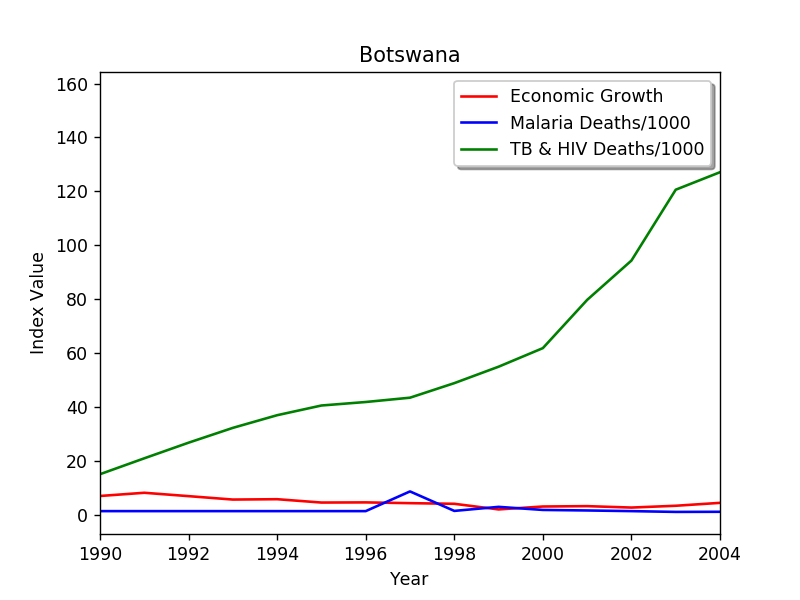

In [54]:
quickPlot3(econ_botswana_plot,malaria_botswana_plot,tb_and_hiv_botswana_plot,'Botswana','Year','Index Value','Economic Growth','Malaria Deaths/1000','TB & HIV Deaths/1000')

For data correlation, each figure features a tupple at the top of the graph showing the pearson correlation matrix(correlation coefficient and the p-value)
Also displayed is the regression line equation (linear regression for simplicity)

<IPython.core.display.Javascript object>


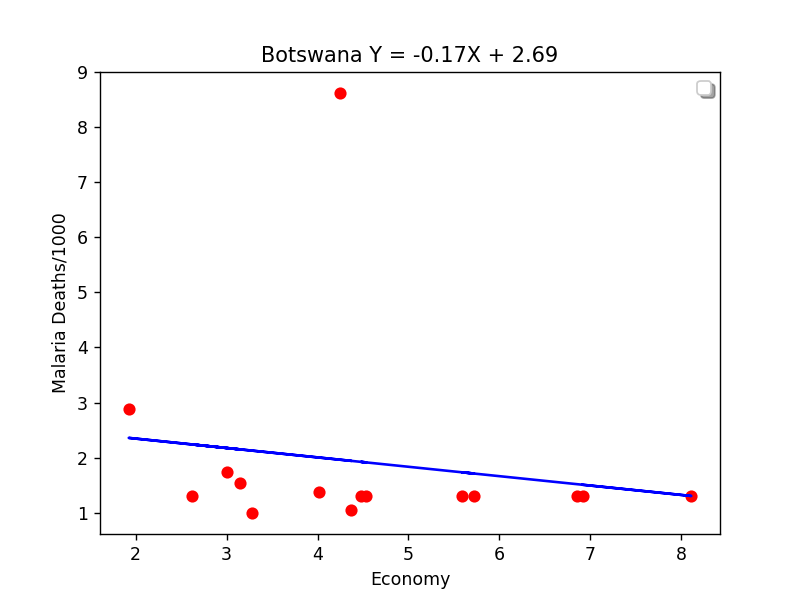

In [35]:
quickScatterPlot(econ_botswana_plot,malaria_botswana_plot,'Botswana','Economy','Malaria Deaths/1000')


<IPython.core.display.Javascript object>


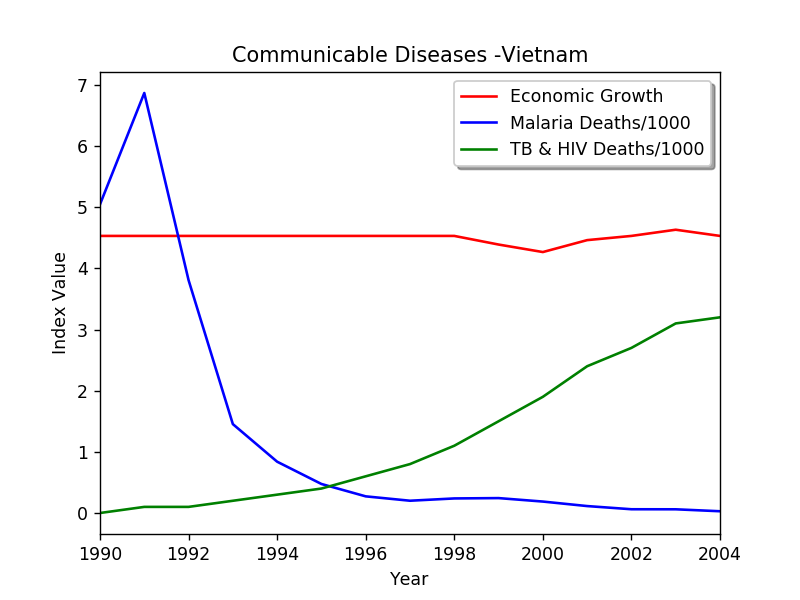

In [37]:
quickPlot3(econ_vietnam_plot,malaria_vietnam_plot,tb_and_hiv_vietnam_plot,'Communicable Diseases -Vietnam','Year','Index Value','Economic Growth','Malaria Deaths/1000','TB & HIV Deaths/1000')

<IPython.core.display.Javascript object>


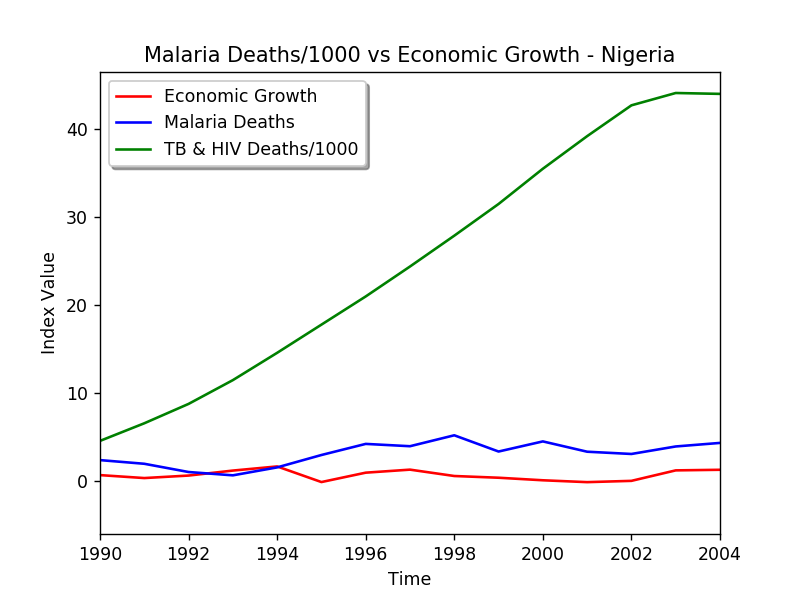

In [38]:
quickPlot3(econ_nigeria_plot,malaria_nigeria_plot,tb_and_hiv_nigeria_plot,'Malaria Deaths/1000 vs Economic Growth - Nigeria','Time','Index Value','Economic Growth','Malaria Deaths','TB & HIV Deaths/1000')

<IPython.core.display.Javascript object>


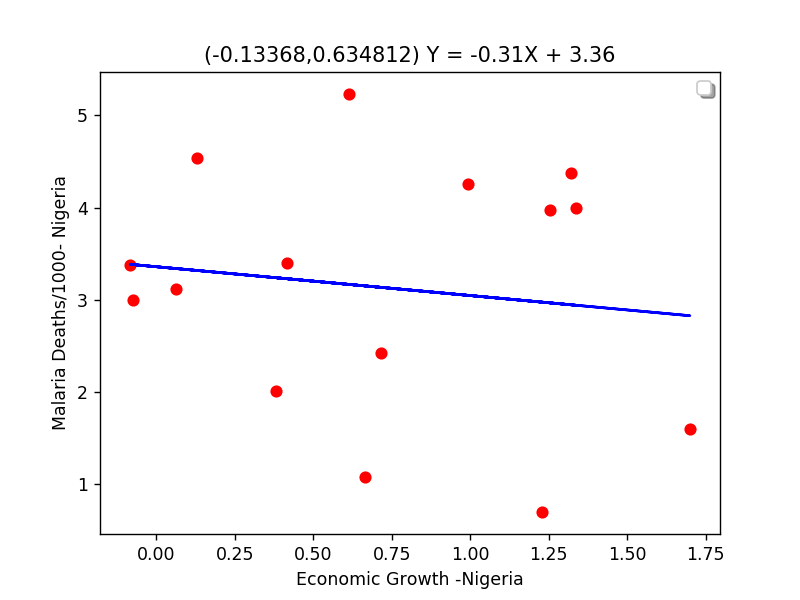

In [39]:
# Correlation and modeling _ Nigeria
results = prepDFs(econ_nigeria_plot,malaria_nigeria_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_nigeria_plot,malaria_nigeria_plot,corrresult,'Economic Growth -Nigeria','Malaria Deaths/1000- Nigeria')

<IPython.core.display.Javascript object>


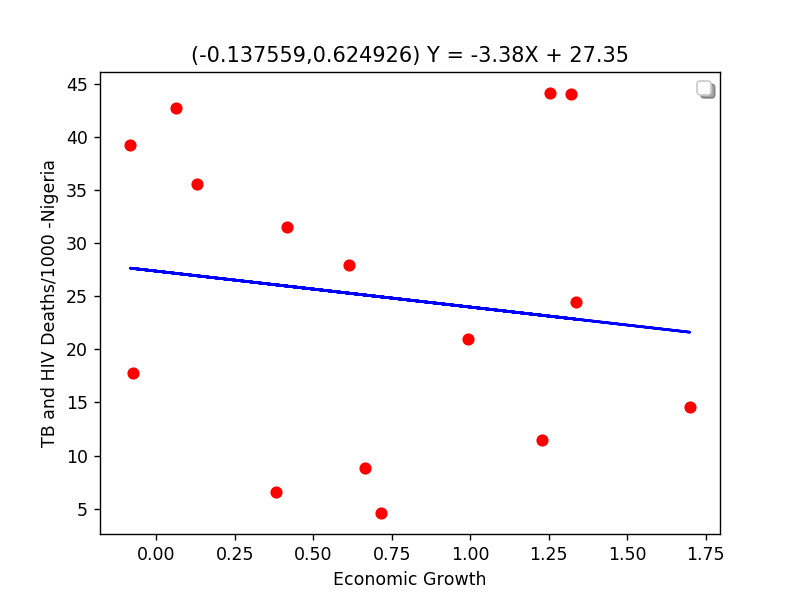

In [40]:
# Correlation and modeling _ Nigeria
results = prepDFs(econ_nigeria_plot,tb_and_hiv_nigeria_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_nigeria_plot,tb_and_hiv_nigeria_plot,corrresult,'Economic Growth','TB and HIV Deaths/1000 -Nigeria')

<IPython.core.display.Javascript object>


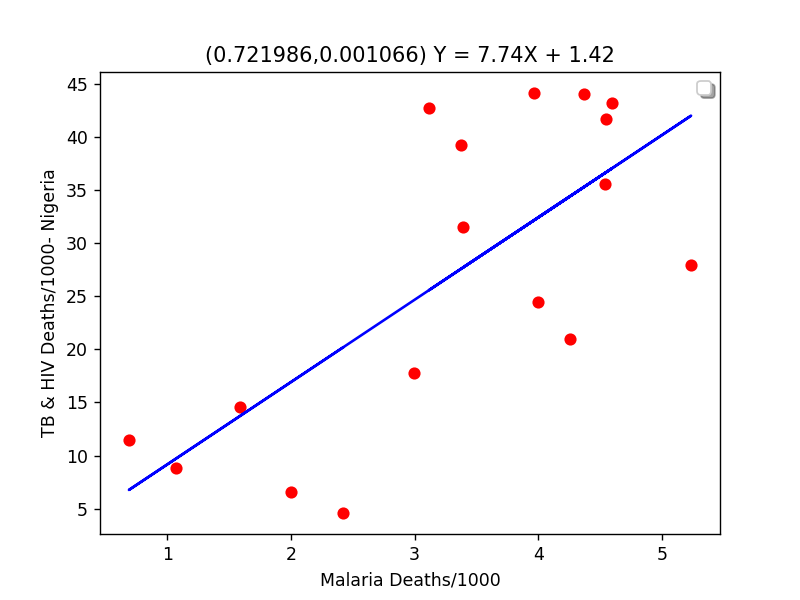

In [41]:
# Correlation and modeling to see the relation between malaria deaths vs tb & hiv deaths in Nigeria
results = prepDFs(malaria_nigeria_plot,tb_and_hiv_nigeria_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(malaria_nigeria_plot,tb_and_hiv_nigeria_plot,corrresult,'Malaria Deaths/1000','TB & HIV Deaths/1000- Nigeria')

Commuincal Diseases: Malaria, TB and HIV - Philippines

<IPython.core.display.Javascript object>


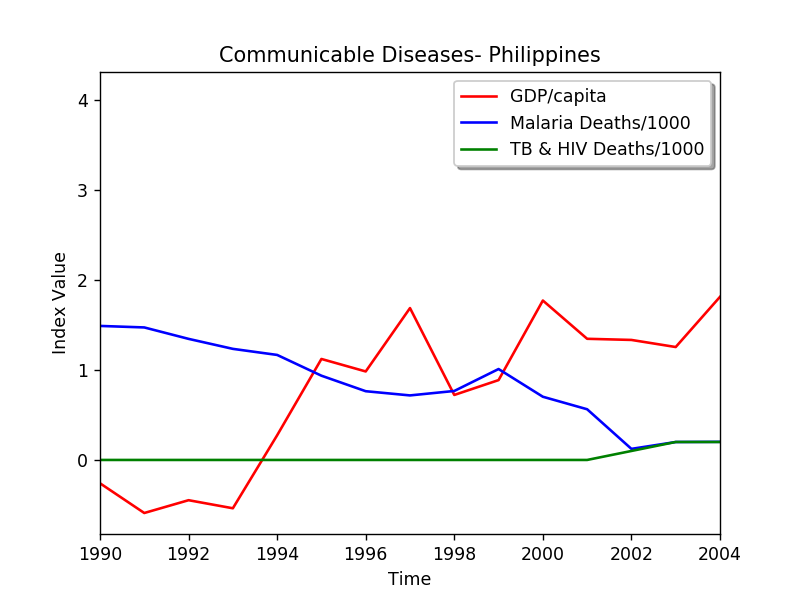

In [42]:
quickPlot3(econ_philippines_plot,malaria_philippines_plot,tb_and_hiv_philippines_plot,'Communicable Diseases- Philippines','Time','Index Value','GDP/capita','Malaria Deaths/1000','TB & HIV Deaths/1000')

<IPython.core.display.Javascript object>


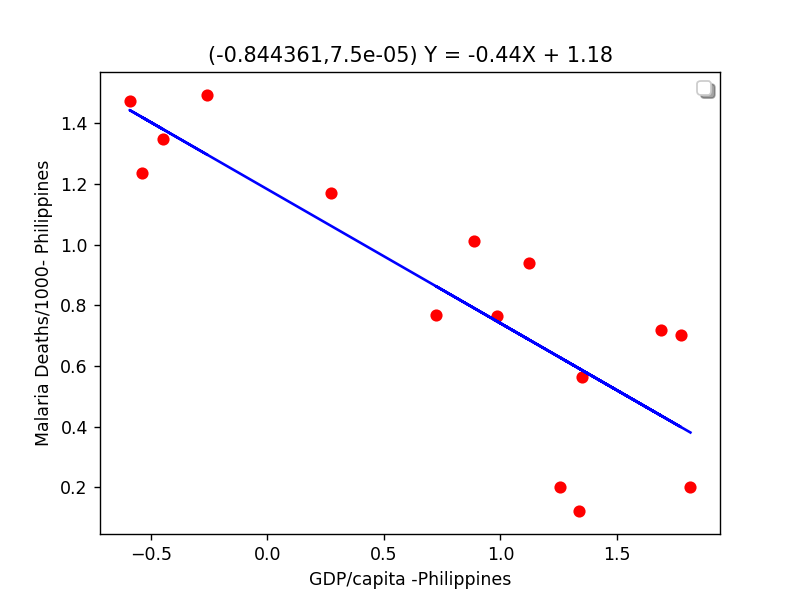

In [44]:
# Correlation of malaria deaths vs gdp growth and modeling _ Philippines
results = prepDFs(econ_philippines_plot,malaria_philippines_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_philippines_plot,malaria_philippines_plot,corrresult,'GDP/capita -Philippines','Malaria Deaths/1000- Philippines')

<IPython.core.display.Javascript object>


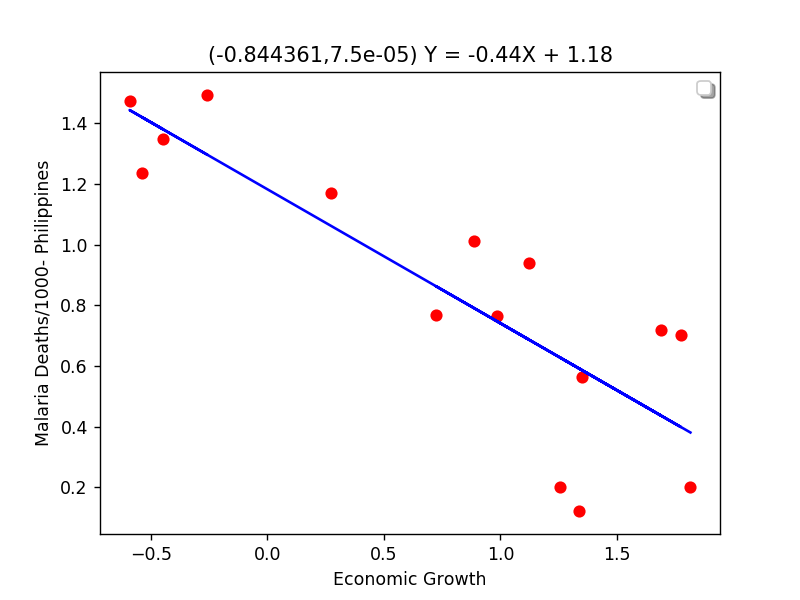

In [45]:
# Correlation and modeling _ Philippines
results = prepDFs(econ_philippines_plot,malaria_philippines_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_philippines_plot,malaria_philippines_plot,corrresult,'Economic Growth','Malaria Deaths/1000- Philippines')

<IPython.core.display.Javascript object>


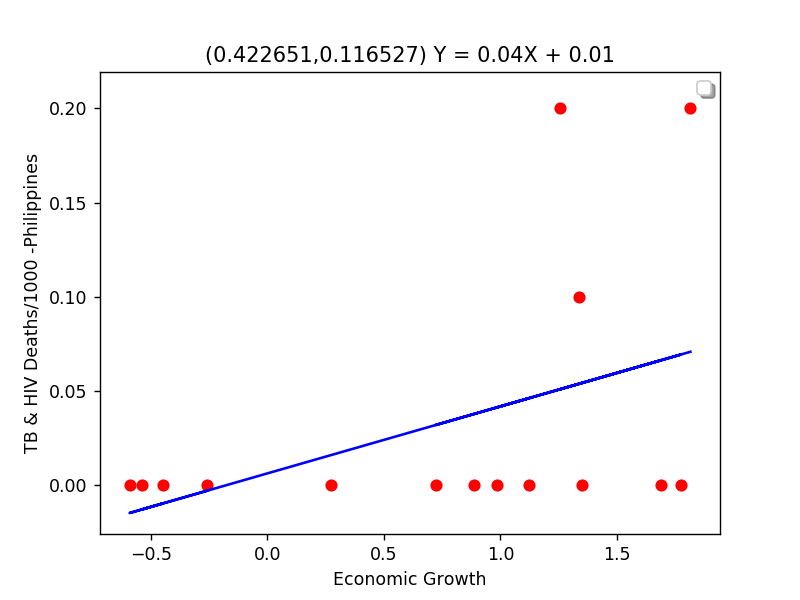

In [46]:
# Correlation and modeling _ Philippines
results = prepDFs(econ_philippines_plot,tb_and_hiv_philippines_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_philippines_plot,tb_and_hiv_philippines_plot,corrresult,'Economic Growth','TB & HIV Deaths/1000 -Philippines')

<IPython.core.display.Javascript object>


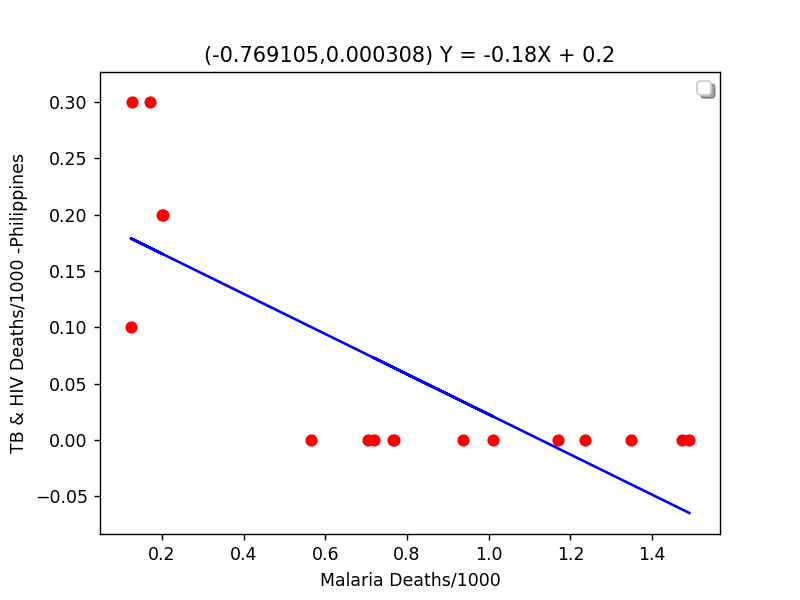

In [47]:
# Correlating malaria deaths and tb/hiv deaths - Philippines
results = prepDFs(malaria_philippines_plot,tb_and_hiv_philippines_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(malaria_philippines_plot,tb_and_hiv_philippines_plot,corrresult,'Malaria Deaths/1000','TB & HIV Deaths/1000 -Philippines')

<p><b>Non-communicable Diseases </b> </p>

High Blood Pressure, Cholesterol levels and BMI, Cancers data for Nigeria, Philippines, Chile, Colombia, Trinidad and Tobego

In [55]:
#Separate datasets cholesterol levels for male and female populations are selected and reshaped.
cholesterol_f_nigeria = cholesterol_f_df[(cholesterol_f_df["Nation"]=='Nigeria')]
cholesterol_f_nigeria_plot = mutateDF(cholesterol_f_nigeria)

cholesterol_m_nigeria = cholesterol_m_df[(cholesterol_m_df["Nation"]=='Nigeria')]
cholesterol_m_nigeria_plot = mutateDF(cholesterol_m_nigeria)

cholesterol_m_ghana = cholesterol_m_df[(cholesterol_m_df["Nation"]=='Ghana')]
cholesterol_m_ghana_plot = mutateDF(cholesterol_m_ghana)

cholesterol_m_kenya = cholesterol_m_df[(cholesterol_m_df["Nation"]=='Kenya')]
cholesterol_m_kenya_plot = mutateDF(cholesterol_m_kenya)

cholesterol_m_china = cholesterol_m_df[(cholesterol_m_df["Nation"]=='China')]
cholesterol_m_china_plot = mutateDF(cholesterol_m_china)

cholesterol_m_india = cholesterol_m_df[(cholesterol_m_df["Nation"]=='India')]
cholesterol_m_india_plot = mutateDF(cholesterol_m_india)

cholesterol_f_usa = cholesterol_f_df[(cholesterol_f_df["Nation"]=='United States')]
cholesterol_f_usa_plot = mutateDF(cholesterol_f_usa)

cholesterol_m_usa = cholesterol_m_df[(cholesterol_m_df["Nation"]=='United States')]
cholesterol_m_usa_plot = mutateDF(cholesterol_m_usa)

cholesterol_f_canada = cholesterol_f_df[(cholesterol_f_df["Nation"]=='Canada')]
cholesterol_f_canada_plot = mutateDF(cholesterol_f_canada)

cholesterol_m_canada = cholesterol_m_df[(cholesterol_m_df["Nation"]=='Canada')]
cholesterol_m_canada_plot = mutateDF(cholesterol_m_canada)

cholesterol_f_philippines = cholesterol_f_df[(cholesterol_f_df["Nation"]=='Philippines')]
cholesterol_f_philippines_plot = mutateDF(cholesterol_f_philippines)

cholesterol_m_philippines = cholesterol_m_df[(cholesterol_m_df["Nation"]=='Philippines')]
cholesterol_m_philippines_plot = mutateDF(cholesterol_m_philippines)
cholesterol_m_philippines_plot.head(2)

cholesterol_f_canada = cholesterol_f_df[(cholesterol_f_df["Nation"]=='Canada')]
cholesterol_f__plot = mutateDF(cholesterol_f_canada)


cholesterol_m_nigeria_plot.head(2)


,Year,Value
1980,1980,4.18612
1981,1981,4.16


BMI 

In [56]:
#BMI index datasets for male and female populations in Nigeria
bmi_f_nigeria = bmi_f_df[(bmi_f_df["Nation"]=='Nigeria')]
bmi_f_nigeria_plot = mutateDF(bmi_f_nigeria)
bmi_m_nigeria = bmi_m_df[(bmi_m_df["Nation"]=='Nigeria')]
bmi_m_nigeria_plot = mutateDF(bmi_m_nigeria)

bmi_m_ghana = bmi_m_df[(bmi_m_df["Nation"]=='Ghana')]
bmi_m_ghana_plot = mutateDF(bmi_m_ghana)

bmi_m_kenya = bmi_m_df[(bmi_m_df["Nation"]=='Kenya')]
bmi_m_kenya_plot = mutateDF(bmi_m_kenya)

bmi_m_china = bmi_m_df[(bmi_m_df["Nation"]=='China')]
bmi_m_china_plot = mutateDF(bmi_m_china)

bmi_m_india = bmi_m_df[(bmi_m_df["Nation"]=='India')]
bmi_m_india_plot = mutateDF(bmi_m_india)


bmi_f_usa = bmi_f_df[(bmi_f_df["Nation"]=='United States')]
bmi_f_usa_plot = mutateDF(bmi_f_usa)

bmi_m_usa = bmi_m_df[(bmi_m_df["Nation"]=='United States')]
bmi_m_usa_plot = mutateDF(bmi_m_usa)

bmi_f_canada = bmi_f_df[(bmi_f_df["Nation"]=='Canada')]
bmi_f_canada_plot = mutateDF(bmi_f_canada)

bmi_m_canada = bmi_m_df[(bmi_m_df["Nation"]=='Canada')]
bmi_m_canada_plot = mutateDF(bmi_m_canada)


bmi_f_nigeria_plot.head(2)

,Year,Value
1980,1980,21.9682
1981,1981,22.0143


Blood Pressure Data

In [63]:
bp_f_nigeria=bp_females[(bp_females.Nation =='Nigeria')]
bp_f_nigeria_plot = mutateDF(bp_f_nigeria)
bp_m_nigeria=bp_males[(bp_males.Nation =='Nigeria')]
bp_m_nigeria_plot = mutateDF(bp_m_nigeria)


bp_m_ghana = bp_males[(bp_males["Nation"]=='Ghana')]
bp_m_ghana_plot = mutateDF(bp_m_ghana)

bp_m_kenya = bp_males[(bp_males["Nation"]=='Kenya')]
bp_m_kenya_plot = mutateDF(bp_m_kenya)

bp_m_china = bp_males[(bp_males["Nation"]=='China')]
bp_m_china_plot = mutateDF(bp_m_china)

bp_m_india = bp_males[(bp_males["Nation"]=='India')]
bp_m_india_plot = mutateDF(bp_m_india)

bp_m_canada = bp_males[(bp_males["Nation"]=='Canada')]
bp_m_canada_plot = mutateDF(bp_m_canada)

bp_m_usa = bp_males[(bp_males["Nation"]=='United States')]
bp_m_usa_plot = mutateDF(bp_m_usa)



bp_f_nigeria_plot.head(2)

,Year,Value
1980,1980,130.993
1981,1981,131.01


Country: Philippines
High Blood Pressure, Cholesterol levels and BMI data for the Philippines

BMI for the Philippines

In [53]:
bmi_f_philippines = bmi_f_df[(bmi_f_df["Nation"]=='Philippines')]
bmi_f_philippines_plot = mutateDF(bmi_f_philippines)

bmi_m_philippines = bmi_m_df[(bmi_m_df["Nation"]=='Philippines')]
bmi_m_philippines_plot = mutateDF(bmi_m_philippines)

bmi_m_canada = bmi_m_df[(bmi_m_df["Nation"]=='Canada')]
bmi_m_canada_plot = mutateDF(bmi_m_canada)

bmi_f_canada = bmi_f_df[(bmi_f_df["Nation"]=='Canada')]
bmi_f_canada_plot = mutateDF(bmi_f_canada)

bp_f_philippines=bp_females[(bp_females.Nation =='Philippines')]
bp_f_philippines_plot = mutateDF(bp_f_philippines)

bp_m_philippines=bp_males[(bp_males.Nation =='Philippines')]
bp_m_philippines_plot = mutateDF(bp_m_philippines)
bp_f_philippines_plot.head(2)

,Year,Value
1980,1980,122.222
1981,1981,122.33


In [43]:
liverc_m_philippines = liverc_m[(liverc_m.Nation =='Philippines')]
liverc_m_canada = liverc_m[(liverc_m.Nation =='Canada')]
liverc_f_canada = liverc_f[(liverc_f.Nation =='Canada')]
brtm_canada = brtm[(brtm.Nation == 'Canada')]
brtm_SA = brtm[(brtm.Nation == 'South Africa')]
brtm_USA = brtm[(brtm.Nation == 'United States')]


<p><b> Visualization of Data on Non-communicable Diseases</b></p>

plt.plot(cholesterol_m_nigeria_plot.Year,cholesterol_m_nigeria_plot.Value,'y',cholesterol_f_nigeria_plot.Year,cholesterol_f_nigeria_plot.Value,'r',econ_nigeria_plot.Year,econ_nigeria_plot.Value,'b',bmi_f_nigeria_plot.Year,bmi_f_nigeria_plot.Value,'g',bmi_m_nigeria_plot.Year,bmi_m_nigeria_plot.Value,'k')

<IPython.core.display.Javascript object>


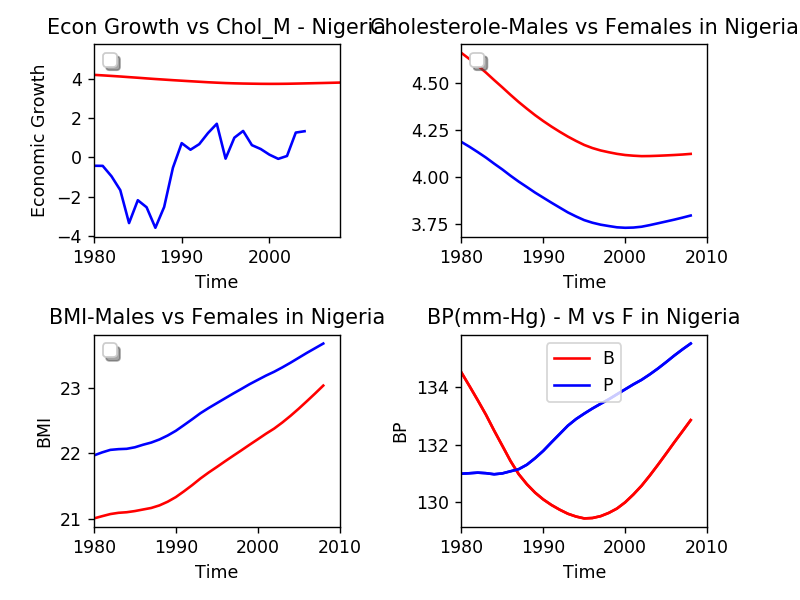

In [44]:
fig = plt.figure()

ax0 = fig.add_subplot(221)
ax0.set_title('Econ Growth vs Chol_M - Nigeria')
ax0.set_xlabel('Time')
ax0.set_ylabel('Economic Growth')
ax0.legend(( 'Econ Growth','Chol'),loc='upper left', shadow=True)
ax0.set_xlim(1980,2008)
ax0.plot(econ_nigeria_plot.Year,econ_nigeria_plot.Value,'b',cholesterol_m_nigeria_plot.Year,cholesterol_m_nigeria_plot.Value,'r')


ax1 = fig.add_subplot(222)
ax1.set_title('Cholesterole-Males vs Females in Nigeria')
ax1.set_xlabel('Time')
ax1.legend(('Chol'),loc='upper left', shadow=True)
ax1.set_xlim(1980,2010)
ax1.plot(cholesterol_m_nigeria_plot.Year,cholesterol_m_nigeria_plot.Value,'b',cholesterol_f_nigeria_plot.Year,cholesterol_f_nigeria_plot.Value,'r')

ax2 = fig.add_subplot(223)
ax2.set_title('BMI-Males vs Females in Nigeria')
ax2.set_xlabel('Time')
ax2.set_ylabel('BMI')
#ax0.plot(econ_nigeria_plot.Year, econ_nigeria_plot.Value,'k-')
ax2.legend(('BMI'),loc='upper left', shadow=True)
ax2.set_xlim(1980,2010)
ax2.plot(bmi_m_nigeria_plot.Year,bmi_m_nigeria_plot.Value,'r',bmi_f_nigeria_plot.Year,bmi_f_nigeria_plot.Value,'b')



ax3 = fig.add_subplot(224)
ax3.set_title('BP(mm-Hg) - M vs F in Nigeria')
ax3.set_xlabel('Time')
ax3.set_ylabel('BP')
#ax1.plot(econ_nigeria_plot.Year, econ_nigeria_plot.Value,'k-')
ax3.legend(('BP'),loc='upper left', shadow=False)
ax3.set_xlim(1980,2010)
ax3.plot(bp_m_nigeria_plot.Year,bp_m_nigeria_plot.Value,'r',bp_f_nigeria_plot.Year,bp_f_nigeria_plot.Value,'b')

#ax1.title('Philippines')

ax3.legend(('BP'),loc='upper center', shadow=False)
ax3.set_xlim(1980,2010)
ax3.plot(bp_m_nigeria_plot.Year,bp_m_nigeria_plot.Value,'r',bp_f_nigeria_plot.Year,bp_f_nigeria_plot.Value,'b')

#ax1.title('Philippines')
plt.tight_layout()
#fig = plt.gcf()

<IPython.core.display.Javascript object>


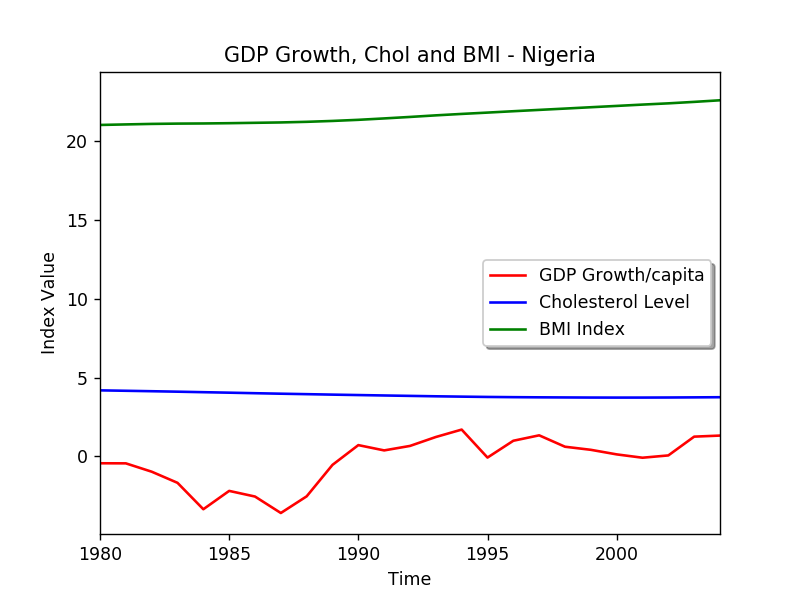

In [45]:
quickPlot3(econ_nigeria_plot,cholesterol_m_nigeria_plot,bmi_m_nigeria_plot,'GDP Growth, Chol and BMI - Nigeria','Time','Index Value','GDP Growth/capita','Cholesterol Level','BMI Index')

<IPython.core.display.Javascript object>


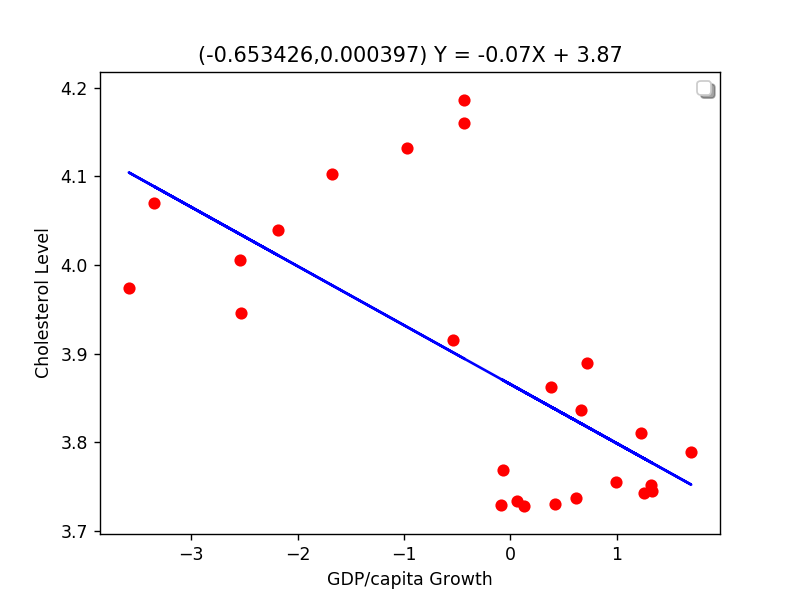

In [65]:
#Pearson correlation between economic growth and cholesterol levels in Nigeria
results = prepDFs(econ_nigeria_plot,cholesterol_m_nigeria_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_nigeria_plot,cholesterol_m_nigeria_plot,corrresult,'GDP/capita Growth','Cholesterol Level')

<IPython.core.display.Javascript object>


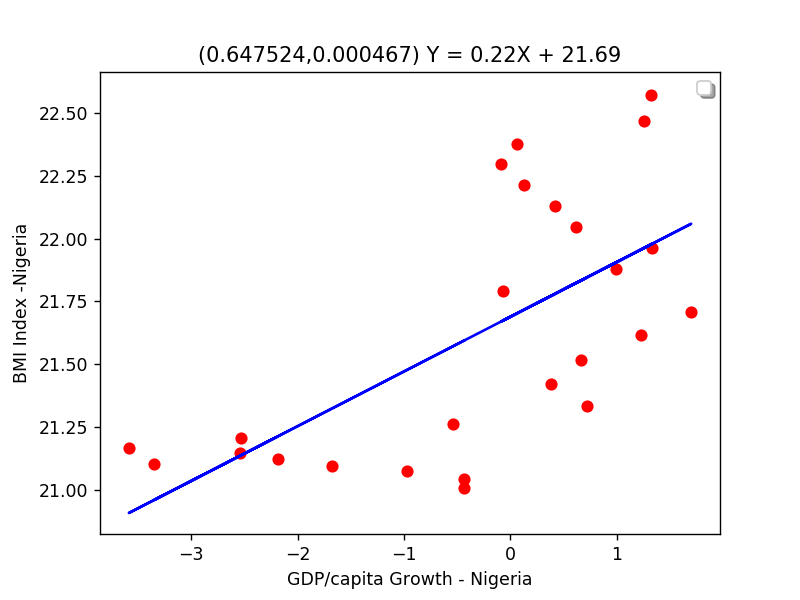

In [66]:
#Correlation between economic growth and bmi index levels in Nigeria

results = prepDFs(econ_nigeria_plot,bmi_m_nigeria_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_nigeria_plot,bmi_m_nigeria_plot,corrresult,'GDP/capita Growth - Nigeria','BMI Index -Nigeria')

<IPython.core.display.Javascript object>


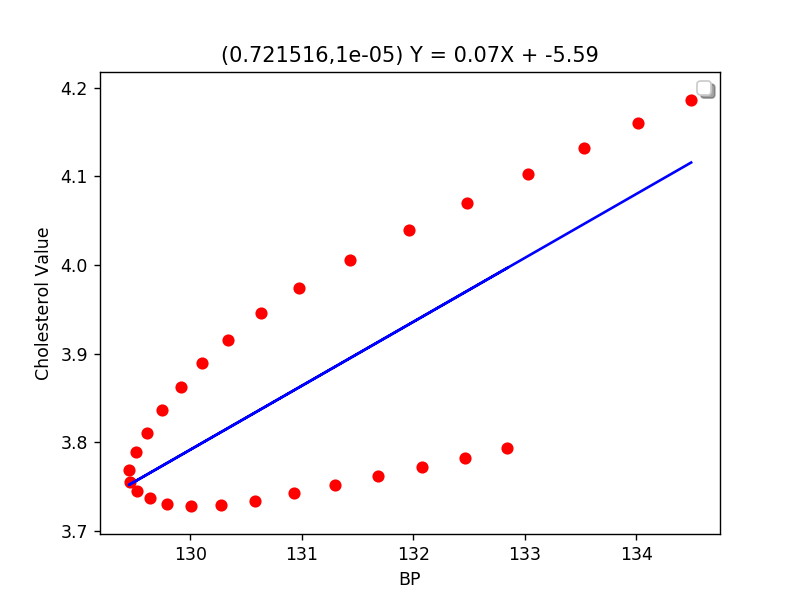

In [67]:
#Correlation between bp and cholesterol levels in Nigeria


results = prepDFs(bp_m_nigeria_plot,cholesterol_m_nigeria_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(bp_m_nigeria_plot,cholesterol_m_nigeria_plot,corrresult,'BP','Cholesterol Value')



<IPython.core.display.Javascript object>


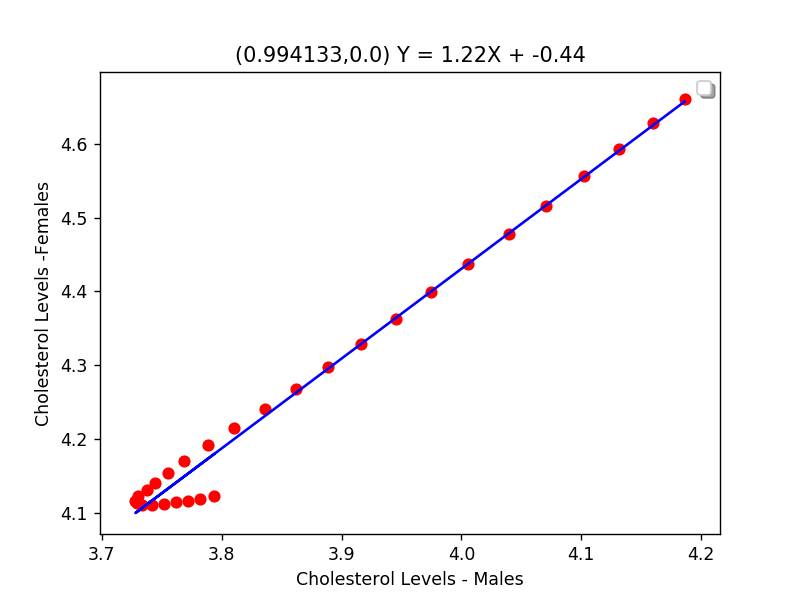

In [47]:
#Pearson correlation between cholesterol levels for males and females in Nigeria
results = prepDFs(cholesterol_m_nigeria_plot,cholesterol_f_nigeria_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(cholesterol_m_nigeria_plot,cholesterol_f_nigeria_plot,corrresult,'Cholesterol Levels - Males','Cholesterol Levels -Females')

Country: Ghana

<IPython.core.display.Javascript object>


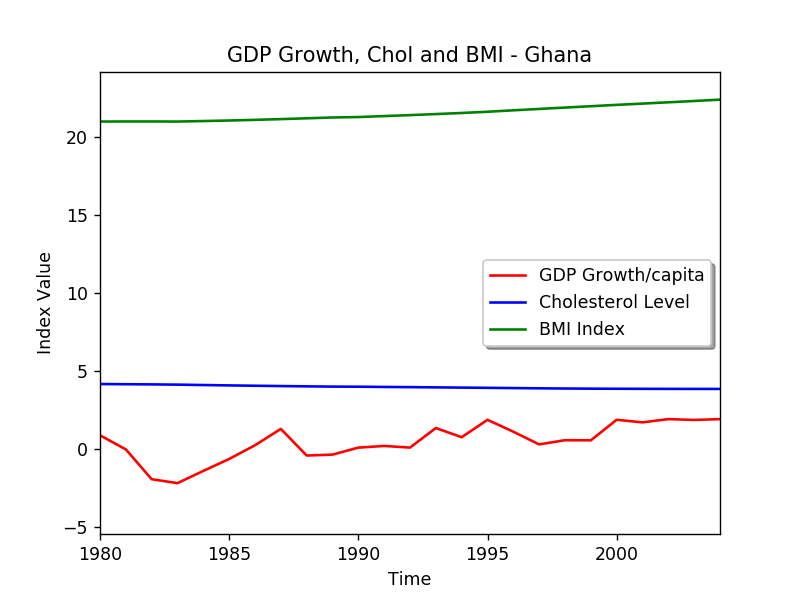

In [48]:
quickPlot3(econ_ghana_plot,cholesterol_m_ghana_plot,bmi_m_ghana_plot,'GDP Growth, Chol and BMI - Ghana','Time','Index Value','GDP Growth/capita','Cholesterol Level','BMI Index')

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


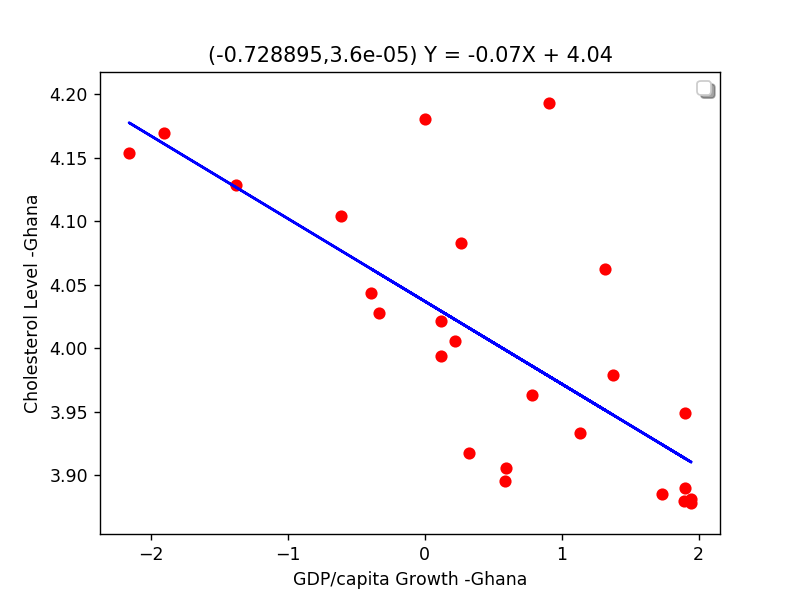

In [49]:
#Pearson correlation between economic growth and cholesterol levels in Nigeria
results = prepDFs(econ_ghana_plot,cholesterol_m_ghana_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_ghana_plot,cholesterol_m_ghana_plot,corrresult,'GDP/capita Growth -Ghana','Cholesterol Level -Ghana')

In [51]:
#Correlation between economic growth and bmi index levels in Ghana

results = prepDFs(econ_ghana_plot,bmi_m_ghana_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_ghana_plot,bmi_m_ghana_plot,corrresult,'GDP/capita Growth - Ghana','BMI Index -Ghana')

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

In [52]:
#Correlation between economic growth and blood pressure levels in Ghana
results = prepDFs(econ_ghana_plot,bp_m_ghana_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_ghana_plot,bp_m_ghana_plot,corrresult,'GDP/capita Growth -Ghana','BP Values -Ghana')

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

Country: Kenya

<IPython.core.display.Javascript object>


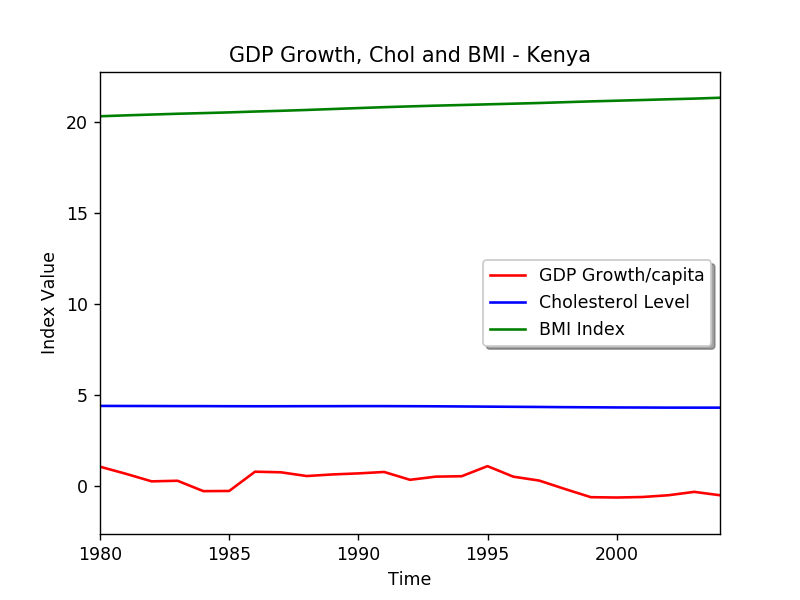

In [58]:
quickPlot3(econ_kenya_plot,cholesterol_m_kenya_plot,bmi_m_kenya_plot,'GDP Growth, Chol and BMI - Kenya','Time','Index Value','GDP Growth/capita','Cholesterol Level','BMI Index')

<IPython.core.display.Javascript object>


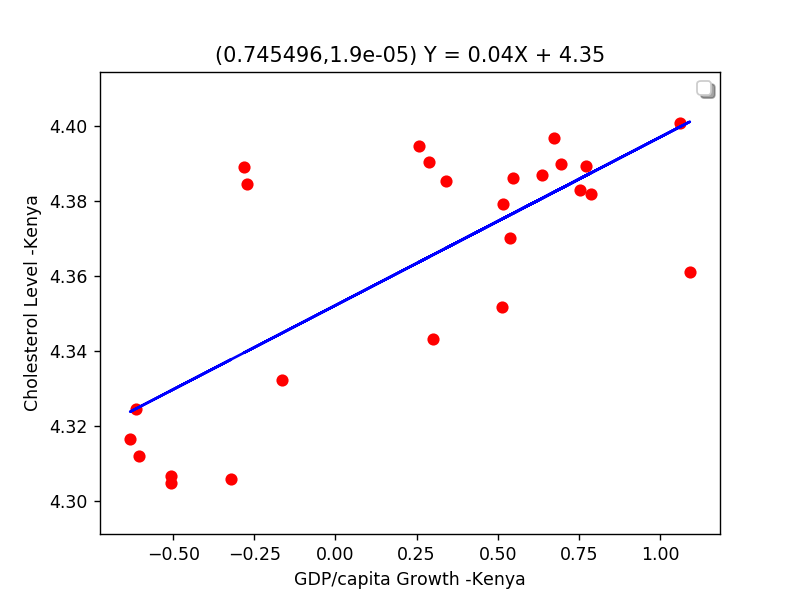

In [59]:

#Pearson correlation between economic growth and cholesterol levels in Kenya
results = prepDFs(econ_kenya_plot,cholesterol_m_kenya_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_kenya_plot,cholesterol_m_kenya_plot,corrresult,'GDP/capita Growth -Kenya','Cholesterol Level -Kenya')


In [55]:
#Correlation between economic growth and bmi index levels in Kenya

results = prepDFs(econ_kenya_plot,bmi_m_kenya_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_kenya_plot,bmi_m_kenya_plot,corrresult,'GDP/capita Growth - Kenya','BMI Index -Kenya')

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

In [56]:
#Correlation between economic growth and blood pressure levels in Kenya
results = prepDFs(econ_kenya_plot,bp_m_kenya_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_kenya_plot,bp_m_kenya_plot,corrresult,'GDP/capita Growth -Kenya','BP Values -Kenya')

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

Country: China

<IPython.core.display.Javascript object>


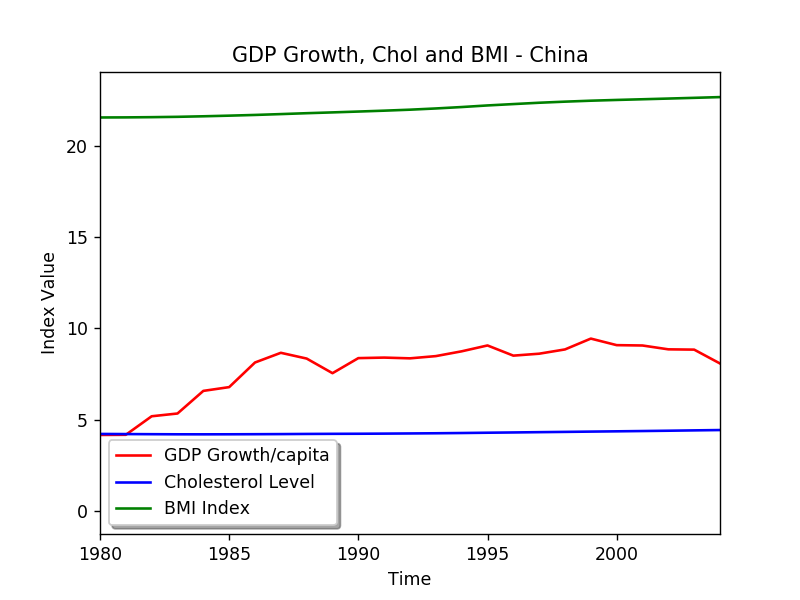

In [60]:
quickPlot3(econ_china_plot,cholesterol_m_china_plot,bmi_m_china_plot,'GDP Growth, Chol and BMI - China','Time','Index Value','GDP Growth/capita','Cholesterol Level','BMI Index')

In [58]:
#Pearson correlation between economic growth and cholesterol levels in Kenya
results = prepDFs(econ_china_plot,cholesterol_m_china_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_china_plot,cholesterol_m_china_plot,corrresult,'GDP/capita Growth -China','Cholesterol Level -China')


c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


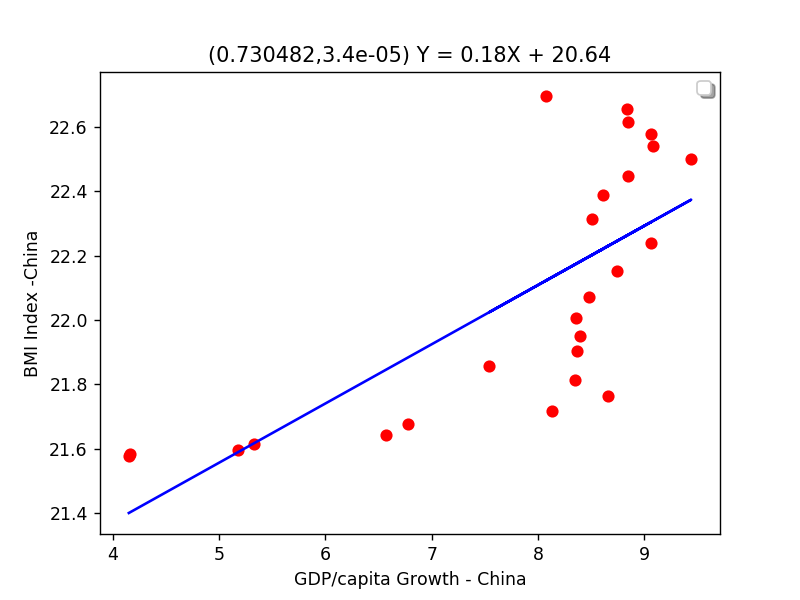

In [59]:
#Correlation between economic growth and bmi index levels in China

results = prepDFs(econ_china_plot,bmi_m_china_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_china_plot,bmi_m_china_plot,corrresult,'GDP/capita Growth - China','BMI Index -China')

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


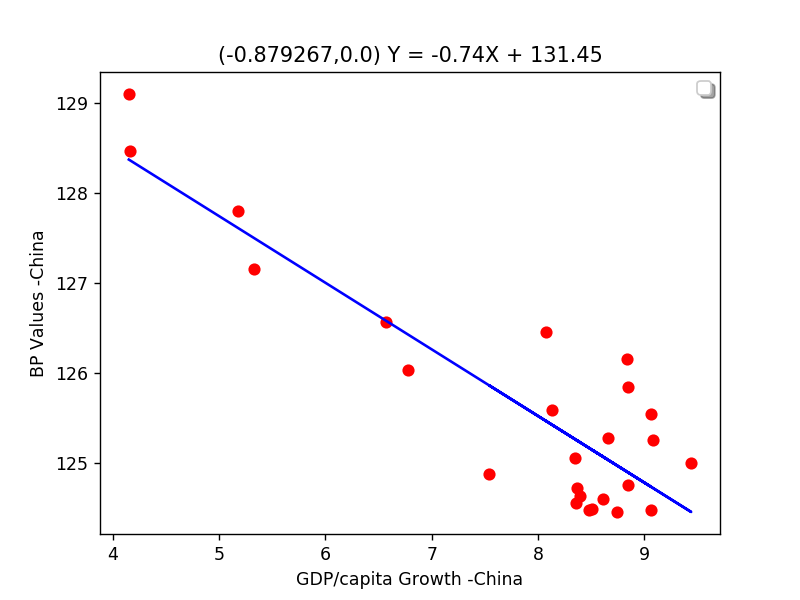

In [60]:
#Correlation between economic growth and blood pressure levels in China
results = prepDFs(econ_china_plot,bp_m_china_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_china_plot,bp_m_china_plot,corrresult,'GDP/capita Growth -China','BP Values -China')

Country: India

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


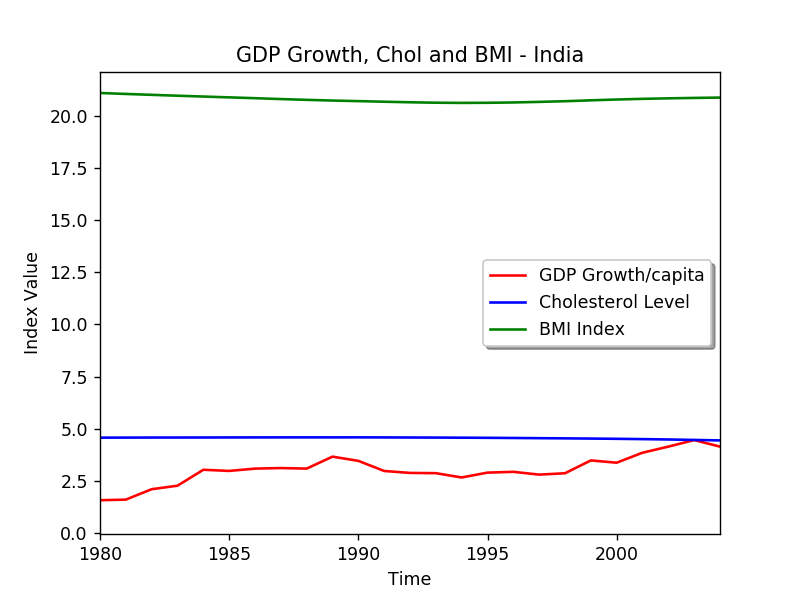

In [61]:
quickPlot3(econ_india_plot,cholesterol_m_india_plot,bmi_m_india_plot,'GDP Growth, Chol and BMI - India','Time','Index Value','GDP Growth/capita','Cholesterol Level','BMI Index')

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


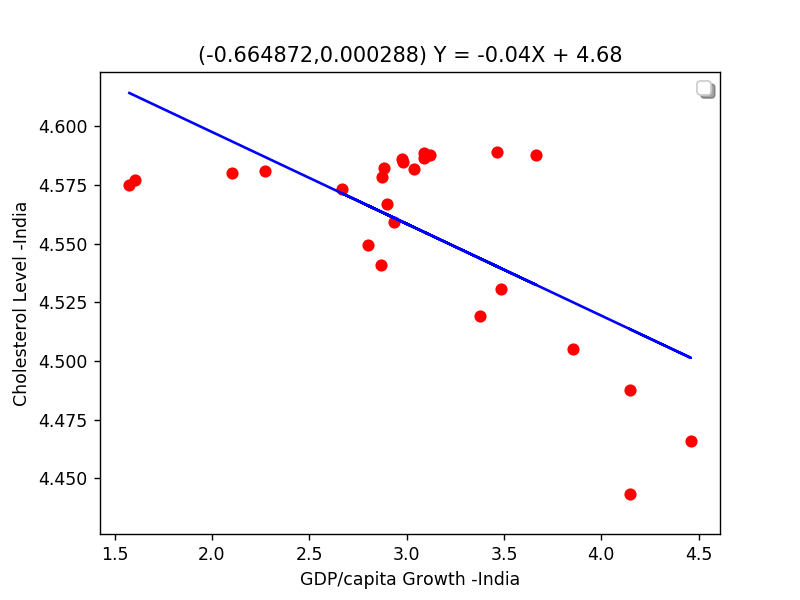

In [62]:
#Pearson correlation between economic growth and cholesterol levels in India
results = prepDFs(econ_india_plot,cholesterol_m_india_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_india_plot,cholesterol_m_india_plot,corrresult,'GDP/capita Growth -India','Cholesterol Level -India')


c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


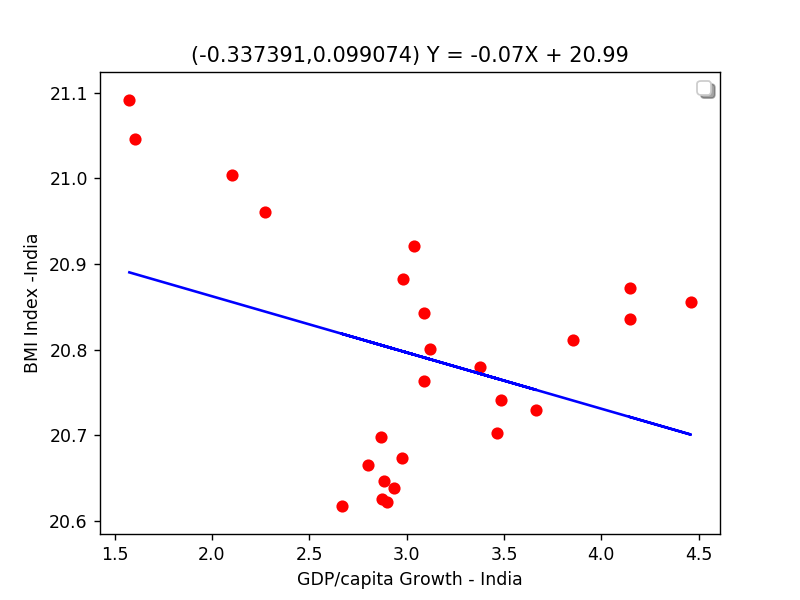

In [63]:
#Correlation between economic growth and bmi index levels in India

results = prepDFs(econ_india_plot,bmi_m_india_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_india_plot,bmi_m_india_plot,corrresult,'GDP/capita Growth - India','BMI Index -India')

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


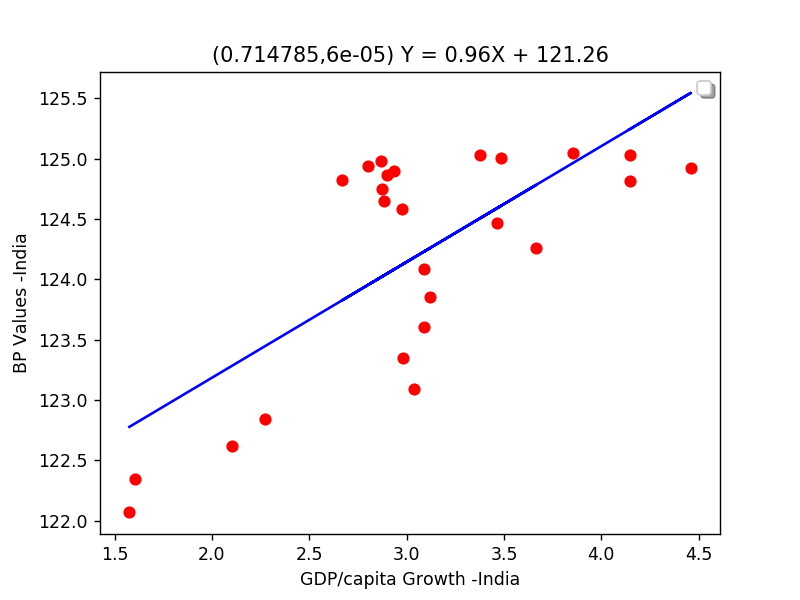

In [64]:
#Correlation between economic growth and blood pressure levels in India
results = prepDFs(econ_india_plot,bp_m_india_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_india_plot,bp_m_india_plot,corrresult,'GDP/capita Growth -India','BP Values -India')

Country: Canada, (not included in results, but rather for observation)

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


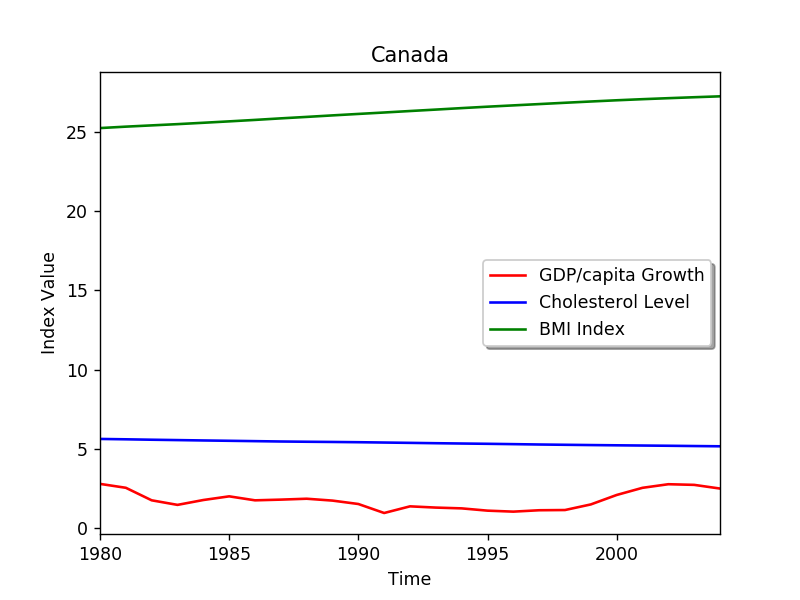

In [65]:
quickPlot3(econ_canada_plot,cholesterol_m_canada_plot,bmi_m_canada_plot,'Canada','Time','Index Value','GDP/capita Growth','Cholesterol Level','BMI Index')

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


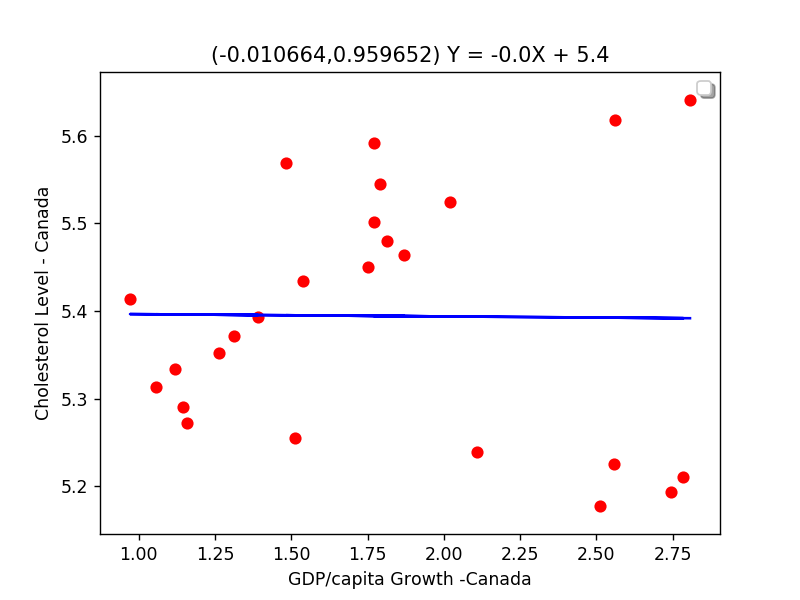

In [66]:
#Pearson correlation between economic growth and cholesterol levels in Canada
results = prepDFs(econ_canada_plot,cholesterol_m_canada_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_canada_plot,cholesterol_m_canada_plot,corrresult,'GDP/capita Growth -Canada','Cholesterol Level - Canada')


c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


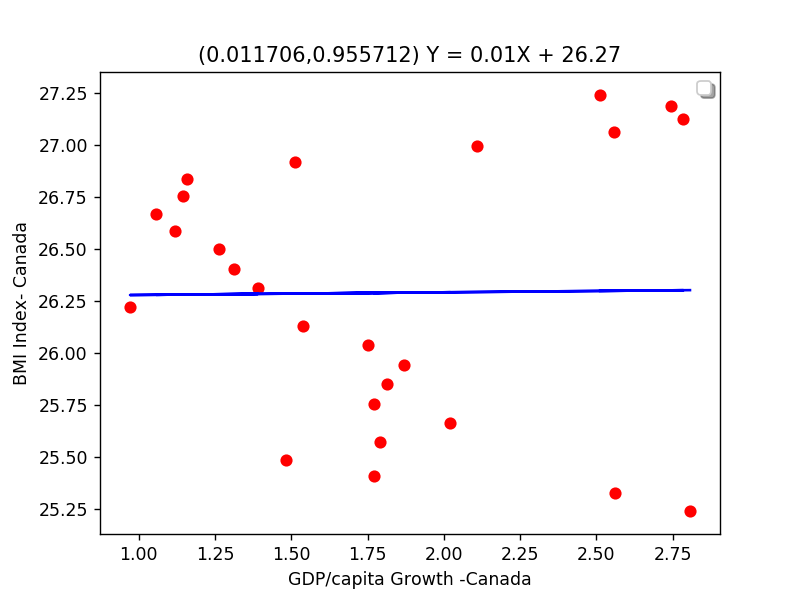

In [67]:
#Pearson correlation between economic growth and BMI levels in Canada
results = prepDFs(econ_canada_plot,bmi_m_canada_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_canada_plot,bmi_m_canada_plot,corrresult,'GDP/capita Growth -Canada','BMI Index- Canada')


<IPython.core.display.Javascript object>


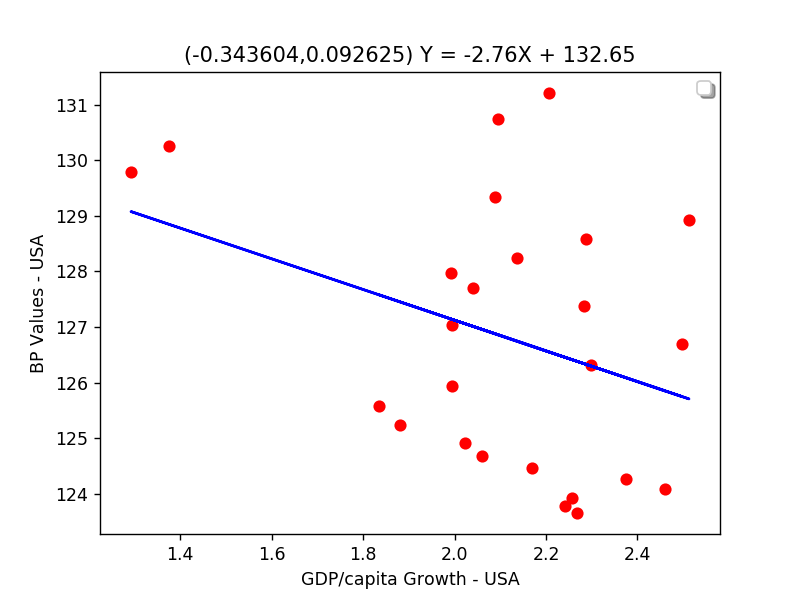

In [64]:
#Correlation between economic growth and blood pressure levels in India
results = prepDFs(econ_usa_plot,bp_m_usa_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_usa_plot,bp_m_usa_plot,corrresult,'GDP/capita Growth - USA','BP Values - USA')

In [ ]:
#Correlation between bp and bmi index levels in Nigeria

results = prepDFs(bmi_m_nigeria_plot,bp_m_nigeria_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(bmi_m_nigeria_plot,bp_m_nigeria_plot,corrresult,'BP Nigeria','BMI Value -Nigeria')



In [ ]:
#Correlation between bp and cholesterol levels in Nigeria


results = prepDFs(bp_m_nigeria_plot,cholesterol_m_nigeria_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(bp_m_nigeria_plot,cholesterol_m_nigeria_plot,corrresult,'BP','Cholesterol Value')



Country: The Philippines
<p>Graphical visualization of the datasets</p>

<IPython.core.display.Javascript object>


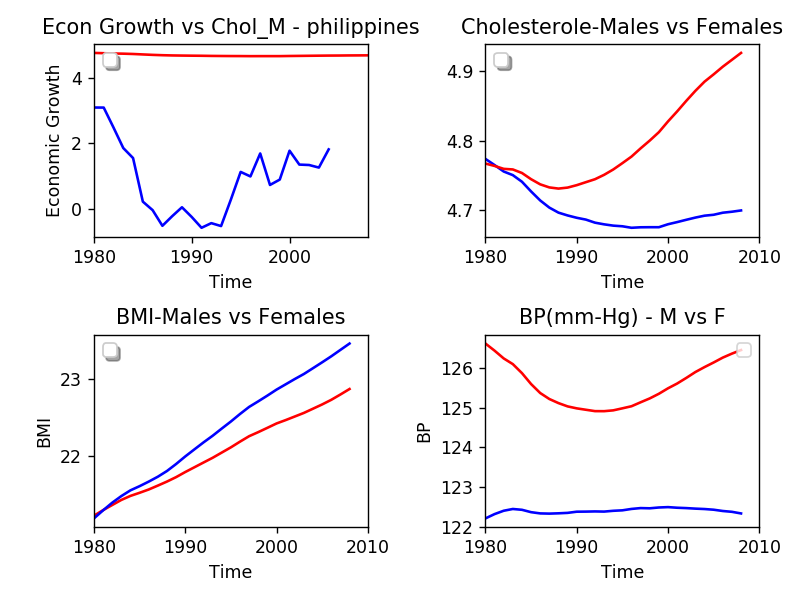

In [68]:
fig = plt.figure()
ax0 = fig.add_subplot(221)
ax0.set_title('Econ Growth vs Chol_M - philippines')
ax0.set_xlabel('Time')
ax0.set_ylabel('Economic Growth')
#ax0.plot(econ_philippines_plot.Year, econ_philippines_plot.Value,'k-')
ax0.legend(( 'Econ Growth','Chol'),loc='upper left', shadow=True)
ax0.set_xlim(1980,2008)
#plt.xticks(np.arange(min(econ_philippines_plot.Year), max(econ_philippines_plot.Year)+1, 10.0))
#ax0.set_xlim(1985,2008)
ax0.plot(econ_philippines_plot.Year,econ_philippines_plot.Value,'b',cholesterol_m_philippines_plot.Year,cholesterol_m_philippines_plot.Value,'r')

ax1 = fig.add_subplot(222)
ax1.set_title('Cholesterole-Males vs Females')
ax1.set_xlabel('Time')
ax1.legend(('Chol'),loc='upper left', shadow=True)
ax1.set_xlim(1980,2010)
ax1.plot(cholesterol_m_philippines_plot.Year,cholesterol_m_philippines_plot.Value,'b',cholesterol_f_philippines_plot.Year,cholesterol_f_philippines_plot.Value,'r')

ax2 = fig.add_subplot(223)
ax2.set_title('BMI-Males vs Females')
ax2.set_xlabel('Time')
ax2.set_ylabel('BMI')
#ax0.plot(econ_philippines_plot.Year, econ_philippines_plot.Value,'k-')
ax2.legend(('BMI'),loc='upper left', shadow=True)
ax2.set_xlim(1980,2010)
ax2.plot(bmi_m_philippines_plot.Year,bmi_m_philippines_plot.Value,'r',bmi_f_philippines_plot.Year,bmi_f_philippines_plot.Value,'b')



ax3 = fig.add_subplot(224)
ax3.set_title('BP(mm-Hg) - M vs F')
ax3.set_xlabel('Time')
ax3.set_ylabel('BP')
#ax1.plot(econ_philippines_plot.Year, econ_philippines_plot.Value,'k-')
ax3.legend(('BP'),loc='upper right', shadow=False)
ax3.set_xlim(1980,2010)
ax3.plot(bp_m_philippines_plot.Year,bp_m_philippines_plot.Value,'r',bp_f_philippines_plot.Year,bp_f_philippines_plot.Value,'b')

#ax1.title('Philippines')
plt.tight_layout()
fig = plt.gcf()

<IPython.core.display.Javascript object>


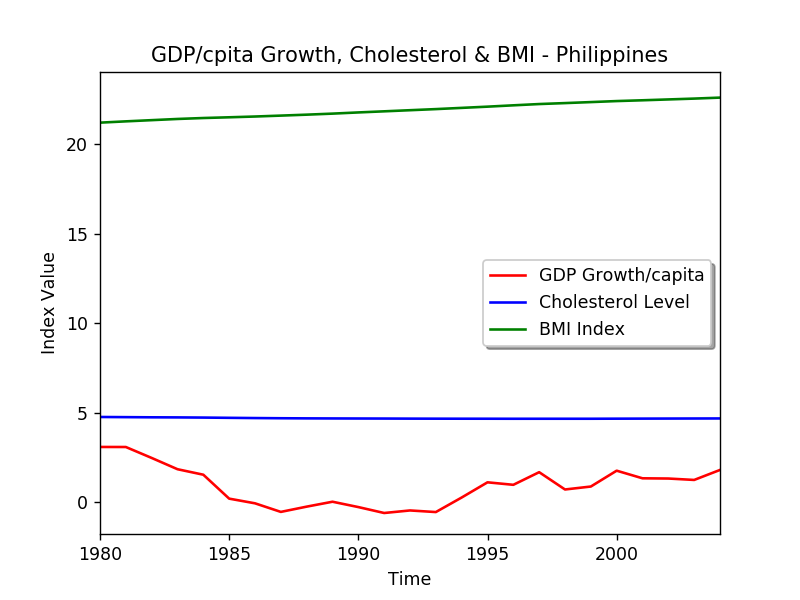

In [70]:
quickPlot3(econ_philippines_plot,cholesterol_m_philippines_plot,bmi_m_philippines_plot,'GDP/cpita Growth, Cholesterol & BMI - Philippines','Time','Index Value','GDP Growth/capita','Cholesterol Level','BMI Index')

Correlation

<IPython.core.display.Javascript object>


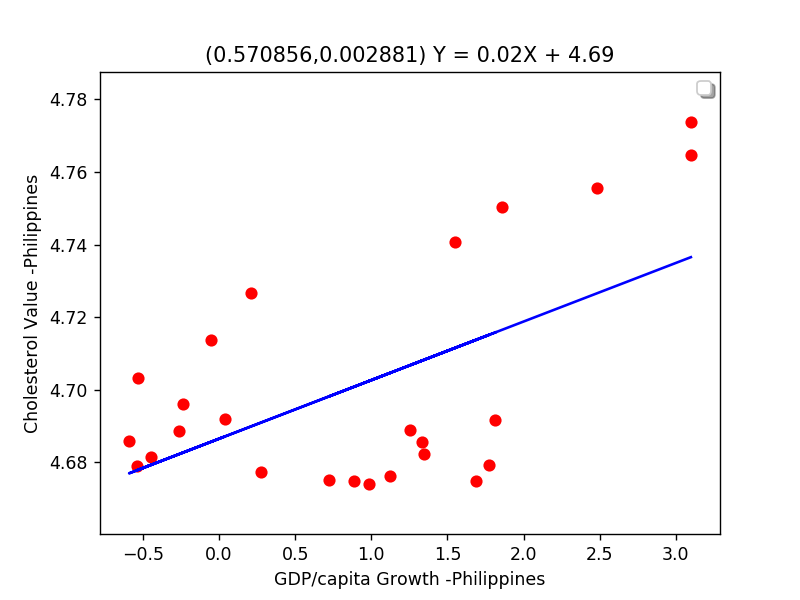

In [69]:
results = prepDFs(econ_philippines_plot,cholesterol_m_philippines_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_philippines_plot,cholesterol_m_philippines_plot,corrresult,'GDP/capita Growth -Philippines','Cholesterol Value -Philippines')


In [ ]:
results = prepDFs(econ_philippines_plot,bmi_m_philippines_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_philippines_plot,bmi_m_philippines_plot,corrresult,'GDP/capita Growth -Philippines','BMI Index -Philippines')


In [ ]:
result5 = prepDFs(econ_philippines_plot,bmi_m_philippines_plot)
spearmanr(result5.Value_x,result5.Value_y)

In [ ]:
results = prepDFs(econ_philippines_plot,bp_m_philippines_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_philippines_plot,bp_m_philippines_plot,corrresult,'GDP/capita Growth','BP Values')


In [ ]:
results = prepDFs(bp_m_philippines_plot,bp_m_philippines_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(bp_m_philippines_plot,bp_m_philippines_plot,corrresult,'Blood Pressure -Males -Philippines','Blood Pressure-Females')


In [ ]:
#Correlation  bmi index and bp levels in Nigeria
result5 = prepDFs(bmi_m_philippines_plot,bp_m_philippines_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(bmi_m_philippines_plot,bp_m_philippines_plot,corrresult,'BMI Index','BP Values')


USA and Canada Analysis

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


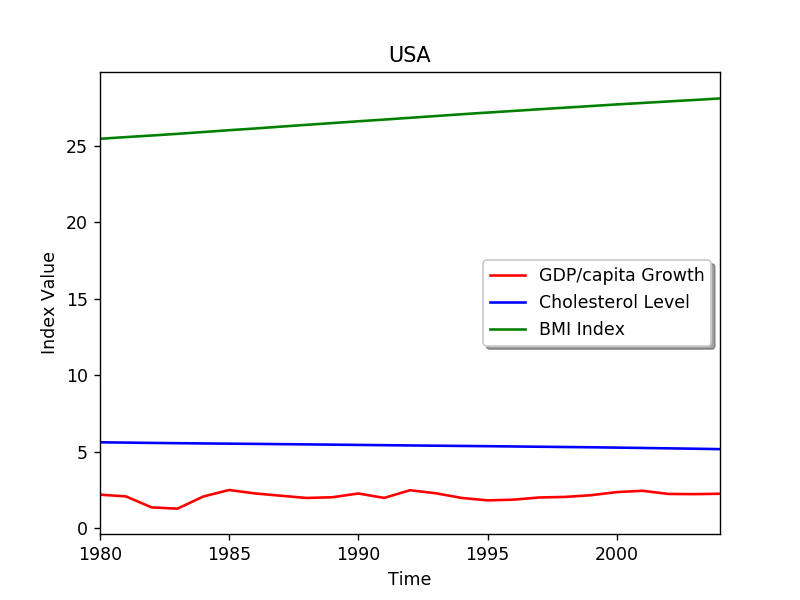

In [71]:
quickPlot3(econ_usa_plot,cholesterol_m_usa_plot,bmi_m_usa_plot,'USA','Time','Index Value','GDP/capita Growth','Cholesterol Level','BMI Index')

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


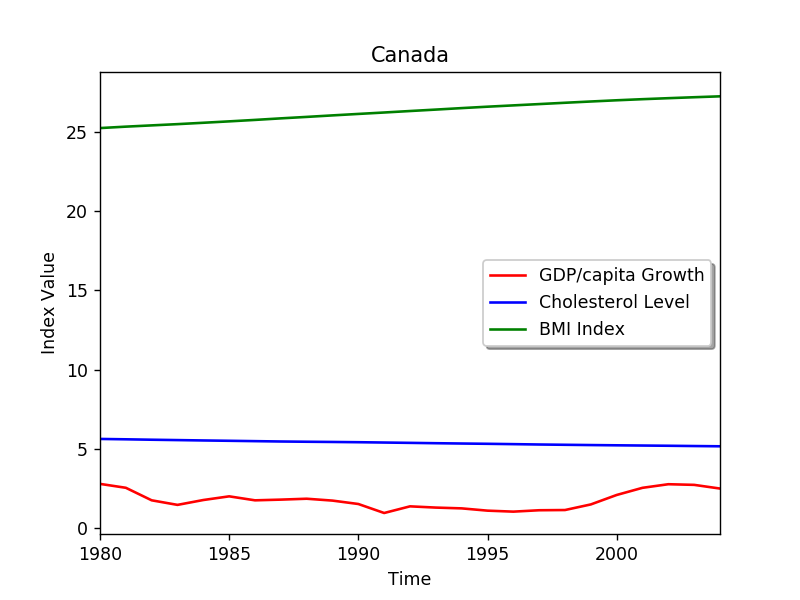

In [72]:
quickPlot3(econ_canada_plot,cholesterol_m_canada_plot,bmi_m_canada_plot,'Canada','Time','Index Value','GDP/capita Growth','Cholesterol Level','BMI Index')

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


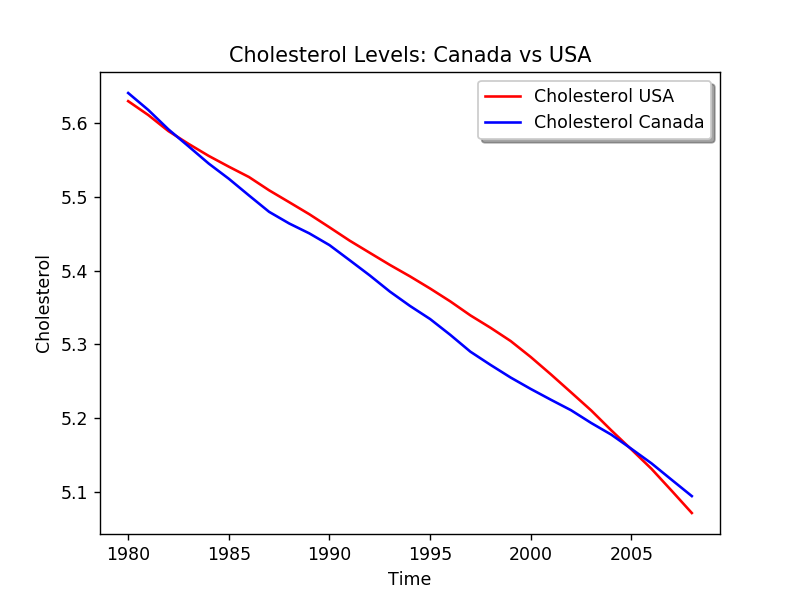

In [73]:
quickPlot2(cholesterol_m_usa_plot,cholesterol_m_canada_plot,'Cholesterol Levels: Canada vs USA','Time','Cholesterol','Cholesterol USA','Cholesterol Canada')

In [74]:
result5 = prepDFs(econ_usa_plot,cholesterol_m_usa_plot)
pearsonr(result5.Value_x,result5.Value_y)

(-0.35044337210795556, 0.0858951873371976)

In [75]:
result5 = prepDFs(econ_canada_plot,cholesterol_m_canada_plot)
pearsonr(result5.Value_x,result5.Value_y)

(-0.010663859476555739, 0.9596515875480073)

In [76]:
result5 = prepDFs(econ_usa_plot,cholesterol_m_usa_plot)
pearsonr(result5.Value_x,result5.Value_y)

(-0.35044337210795556, 0.0858951873371976)

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


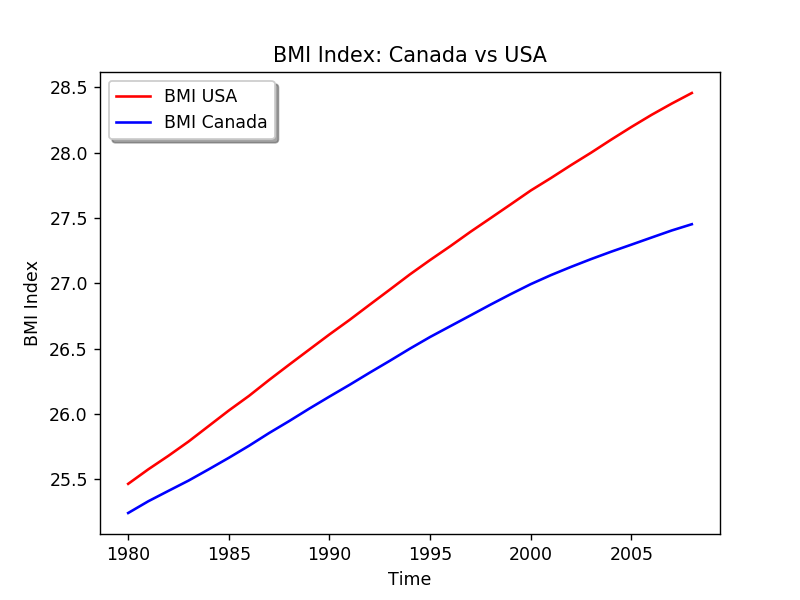

In [77]:
quickPlot2(bmi_m_usa_plot,bmi_m_canada_plot,'BMI Index: Canada vs USA','Time','BMI Index','BMI USA','BMI Canada')

In [ ]:
#BMI correlation: Men vs women in Canada

results =prepDFs(bmi_m_canada_plot,bmi_f_canada_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(bmi_m_canada_plot,bmi_f_canada_plot,corrresult,'BMI -Men in Canada','BMI Women in Canada')


In [ ]:
quickPlot2(bmi_m_nigeria_plot,bmi_m_philippines_plot,'BMI Index: Nigeria vs Philippines','Time','BMI Index','BMI Nigeria','BMI Philippines')

Non-Communicable Diseases: Cancers
<p><b>Breast Cancer: Chile, USA</b></p>
<p>Liver Cancer</p>
<p>Colorectal Cancer</p>
<p>Stomach Cancer</p>
<p>Lung Cancer</p>

<p>Datasets and preparation/Wrangling. The datsets choosen miss atmost 5 out of 54 entries</p>
DataFrame.dropna(axis='rows',thresh=49)

In [78]:
brtm_Canada = brtm[(brtm['Nation']=='Canada')]
brtm_canada_plot =mutateDF(brtm_Canada)

brtm_Trinidad = brtm[(brtm['Nation']=='Trinidad and Tobago')]
brtm_trinidad_plot = mutateDF(brtm_Trinidad)

brtm_USA = brtm[(brtm['Nation']=='United States')]
brtm_usa_plot = mutateDF(brtm_USA)
brtm_Chile = brtm[(brtm['Nation']=='Chile')]
brtm_chile_plot = mutateDF(brtm_Chile)

In [79]:
#Choose Canada and USA
liver_m_can = liverc_m[(liverc_m['Nation']=='Canada')]
liver_f_can = liverc_f[(liverc_f['Nation']=='Canada')]
liver_f_canada_plot = mutateDF(liver_f_can)
liver_m_canada_plot = mutateDF(liver_f_can)

liver_m_usa = liverc_m[(liverc_m['Nation']=='United States')]
liver_f_usa = liverc_f[(liverc_f['Nation']=='United States')]


In [80]:
#Choose Chile, USA, Canada
colrec_m_canada= colrec_m[(colrec_m['Nation']=='Canada')]
colrec_m_canada_plot = mutateDF(colrec_m_canada)
colrec_f_canada= colrec_f[(colrec_f['Nation']=='Canada')]
colrec_f_canada_plot = mutateDF(colrec_f_canada)

colrec_m_USA = colrec_m[(colrec_m['Nation']=='United States')]
colrec_f_USA = colrec_f[(colrec_f['Nation']=='United States')]
colrec_f_usa_plot = mutateDF(colrec_f_USA)
colrec_m_usa_plot = mutateDF(colrec_m_USA)

colrec_m_chile = colrec_m[(colrec_m['Nation']=='Chile')]
colrec_f_chile = colrec_f[(colrec_f['Nation']=='Chile')]
colrec_f_chile_plot = mutateDF(colrec_f_chile)
colrec_m_chile_plot = mutateDF(colrec_m_chile)

#Chile Colombia
stomach_m_chile = stomach_m[(stomach_m['Nation']=='Chile')]
stomach_f_chile = stomach_f[(stomach_f['Nation']=='Chile')]
stomach_m_colombia = stomach_m[(stomach_m['Nation']=='Colombia')]
stomach_f_colombia = stomach_f[(stomach_f['Nation']=='Colombia')]
stomach_f_chile_plot = mutateDF(stomach_f_chile)
stomach_m_chile_plot = mutateDF(stomach_m_chile)
stomach_m_colombia_plot = mutateDF(stomach_m_colombia)
stomach_f_colombia_plot = mutateDF(stomach_f_colombia)

#Lung choose Trinada and Chile
lung_m_chile = lung_m[(lung_m['Nation']=='Chile')]
lung_f_chile = lung_f[(lung_f['Nation']=='Chile')]
lung_f_chile_plot = mutateDF(lung_f_chile)
lung_m_chile_plot = mutateDF(lung_m_chile)

#lung_m_Trinidad = fillMissingValues(lung_m[(lung_m['Nation']=='Trinidad and Tobago')])
lung_f_Trinidad = lung_f[(lung_f['Nation']=='Trinidad and Tobago')]
lung_m_Trinidad = lung_m[(lung_m['Nation']=='Trinidad and Tobago')]
lung_f_trinidad_plot = mutateDF(lung_f_Trinidad)
lung_m_trinidad_plot = mutateDF(lung_m_Trinidad)
ff = fillMissingValues(lung_m_trinidad_plot)


Country: Trinidad and Tobago - Lung and Breast Cancer

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


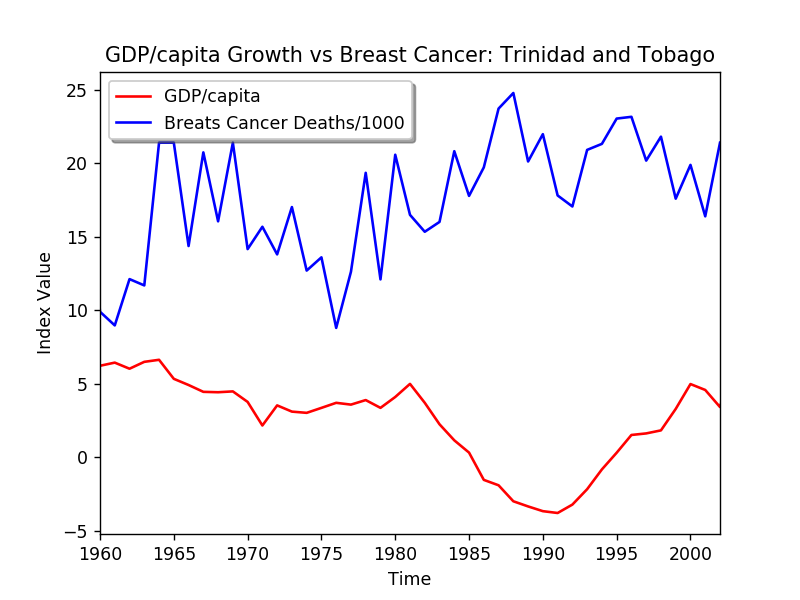

In [83]:
quickPlot2(econ_trinidad_plot,brtm_trinidad_plot,'GDP/capita Growth vs Breast Cancer: Trinidad and Tobago','Time','Index Value','GDP/capita','Breats Cancer Deaths/1000')

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


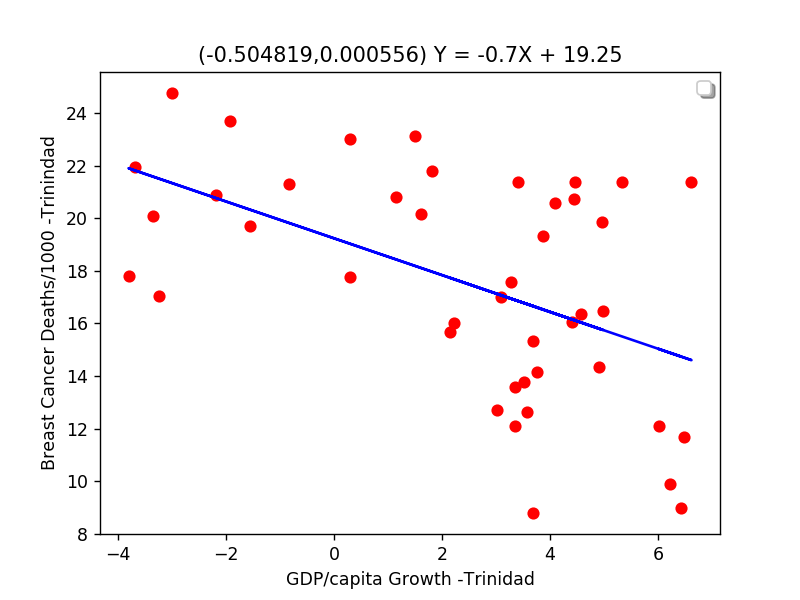

In [84]:
#Correlation between breats cancer deaths and economic growth in Trinidad

results =prepDFs(econ_trinidad_plot,brtm_trinidad_plot)
corr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_trinidad_plot,brtm_trinidad_plot,corrresult,'GDP/capita Growth -Trinidad','Breast Cancer Deaths/1000 -Trinindad')


c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


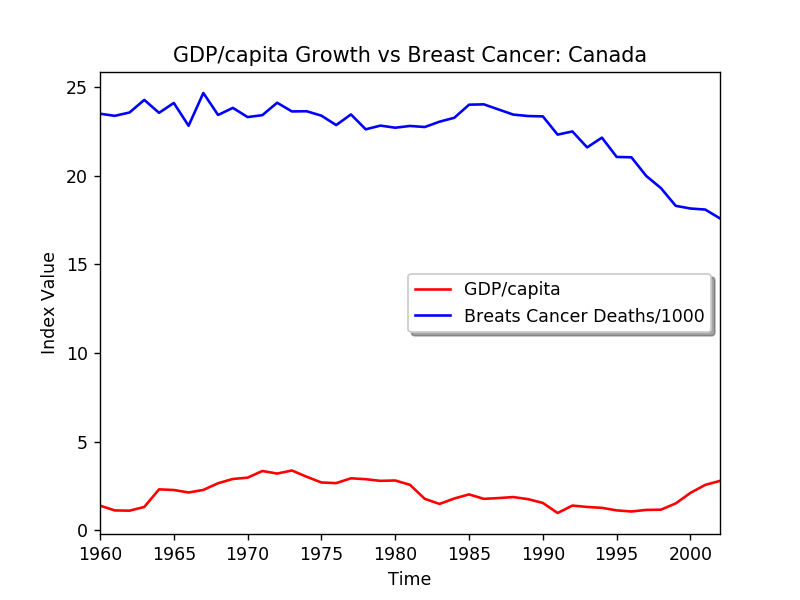

In [81]:
quickPlot2(mutateDF(econ_canada), brtm_canada_plot,'GDP/capita Growth vs Breast Cancer: Canada','Time','Index Value','GDP/capita','Breats Cancer Deaths/1000')

Correlation and Regression

In [82]:
#Pearson corelation and P value for economic growth and breast cancer deaths - Canada
#Not includeded
econ_canada_plot = mutateDF(econ_canada)
result1 = prepDFs(econ_canada_plot,brtm_canada_plot)
pearsonr(result1.Value_x,result1.Value_y)

(0.19200844462922365, 0.2173900048326042)

In [ ]:
#Spearman correlation between breats cancer deaths and economic growth in Trinidad
result2 = prepDFs(econ_trinidad_plot,brtm_trinidad_plot)
spearmanr(result2.Value_x,result2.Value_y)

In [ ]:
quickPlot3(econ_chile_plot,colrec_m_chile_plot,colrec_f_chile_plot,'Econ Growth vs Colorectal Cancer: Males vs Females in Chile','Time','Index Value','GDP/capita','Colorectal-Men','Colorectal-F')

In [ ]:
#Correlation between economic growth and colorectal cancer deaths in Chile
results = prepDFs(econ_chile_plot,colrec_m_chile_plot)
ccorr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_chile_plot,colrec_m_chile_plot,corrresult,'GDP/capita Growth -Chile','Colorectal Cancer Deaths/1000 -Chile')


In [ ]:
#Correlation between economic growth and colorectal cancer deaths in Chile
result3 = prepDFs(econ_chile_plot,colrec_m_chile_plot)
corr = pearsonr(result3.Value_x,result3.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
corrresult
quickScatterPlot(econ_chile_plot,colrec_m_chile_plot,corrresult,'GDP/capital Growth','Colorectal cancer deaths/1000')

In [86]:
lg = lgfunction(econ_chile_plot,colrec_m_chile_plot)
#lg[2].append(pd.DataFrame({x.item(0) for x in lg[0]}, ignore_index=True))
df = pd.DataFrame((lg[0][x] for x in range(0,len(lg[0])-1)),columns=['Predictions'])
x = lg[0]

In [87]:
#Correlation between colorectal cancer deaths in Chile for men ver women
result4 = prepDFs(colrec_m_chile_plot,colrec_f_chile_plot)
pearsonr(result4.Value_x,result4.Value_y)

(0.6324860510060942, 1.416791785073009e-06)

c:\users\kindzekas\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


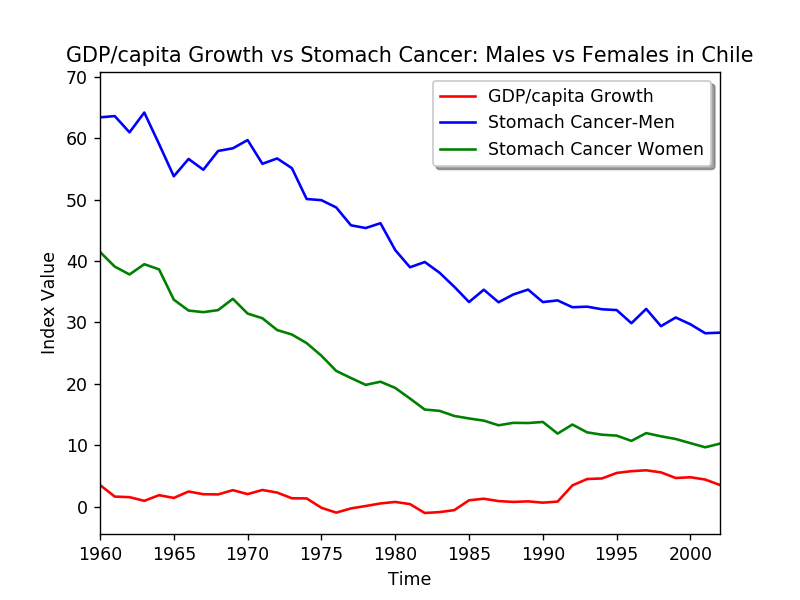

In [88]:
quickPlot3(econ_chile_plot,stomach_m_chile_plot,stomach_f_chile_plot,'GDP/capita Growth vs Stomach Cancer: Males vs Females in Chile','Time','Index Value','GDP/capita Growth','Stomach Cancer-Men','Stomach Cancer Women')

In [ ]:
#Correlation between economic growth and stomach cancer deaths in Chile for men.
result = prepDFs(econ_chile_plot,stomach_m_chile_plot)

results = prepDFs(econ_chile_plot,stomach_m_chile_plot)
ccorr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_chile_plot,stomach_m_chile_plot,corrresult,'GDP/capita Growth -Chile','Stomach Cancer Deaths/1000 -Chile')


In [ ]:
#Correlation between economic growth and stomach cancer deaths in Chile for women.
result5 = prepDFs(econ_chile_plot,stomach_f_chile_plot)
pearsonr(result5.Value_x,result5.Value_y)

In [ ]:
#Correlation between stomach cancer deaths in Chile for men ver women
result5 = prepDFs(stomach_m_chile_plot,stomach_f_chile_plot)
pearsonr(result5.Value_x,result5.Value_y)

In [ ]:
quickPlot3(econ_colombia_plot,stomach_m_colombia_plot,stomach_f_colombia_plot,'Econ. Growth vs Stomach Cancer: Colombia Males vs Females')

In [ ]:
#Correlation between economic growth and stomach cancer deaths in Colombia for men.
result5 = prepDFs(econ_colombia_plot,stomach_m_colombia_plot)
pearsonr(result5.Value_x,result5.Value_y)

In [ ]:
#Correlation between stomach cancer deaths in Colombia for men vs women
result5 = prepDFs(stomach_m_colombia_plot,stomach_f_colombia_plot)
pearsonr(result5.Value_x,result5.Value_y)

In [ ]:
quickPlot3(econ_trinidad_plot,lung_m_trinidad_plot,lung_f_trinidad_plot,'GDP Growth vs Lung Cancer in Trinindad','Time','Index Value','GDP/capita Growth','Lung Cancer Deaths/1000 Men','Lung Cancer Deaths/1000 -Women')

In [ ]:
#Correlation between lung cancer deaths in Trinidad for men
results = prepDFs(econ_trinidad_plot,lung_m_trinidad_plot)

ccorr = pearsonr(results.Value_x,results.Value_y)
corrv1 = str(round(corr[0],6))
corrv2 = str(round(corr[1],6))
corrresult = '('+corrv1 +','+corrv2+')'
quickScatterPlot(econ_trinidad_plot,lung_m_trinidad_plot,corrresult,'GDP/capita Growth -Trinidad','Lung Cancer Deaths/1000 -Men -Trinidad')


In [ ]:
#Correlation between lung cancer deaths in Trinidad for women
result5 = prepDFs(econ_trinidad_plot,lung_f_trinidad_plot)
pearsonr(result5.Value_x,result5.Value_y)

In [90]:
#Correlation between lung cancer deaths in Trinidad for women
result5 = prepDFs(lung_m_trinidad_plot,lung_f_trinidad_plot)
pearsonr(result5.Value_x,result5.Value_y)

(0.5699335008212453, 8.407496832908096e-06)